In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pyreadr


result = pyreadr.read_r(r'D:\TEP_data\TEP_FaultFree_Training.RData')
df = result[None] if None in result else list(result.values())[0]
df = pd.DataFrame(df)

In [3]:
X_dict = {
'XMEAS_1':'A_feed_stream',
'XMEAS_2':'D_feed_stream',
'XMEAS_3':'E_feed_stream',
'XMEAS_4':'Total_fresh_feed_stripper',
'XMEAS_5':'Recycle_flow_into_rxtr',
'XMEAS_6':'Reactor_feed_rate',
'XMEAS_7':'Reactor_pressure',
'XMEAS_8':'Reactor_level',
'XMEAS_9':'Reactor_temp',
'XMEAS_10':'Purge_rate',
'XMEAS_11':'Separator_temp',
'XMEAS_12':'Separator_level',
'XMEAS_13':'Separator_pressure',
'XMEAS_14':'Separator_underflow',
'XMEAS_15':'Stripper_level',
'XMEAS_16':'Stripper_pressure',
'XMEAS_17':'Stripper_underflow',
'XMEAS_18':'Stripper_temperature',
'XMEAS_19':'Stripper_steam_flow',
'XMEAS_20':'Compressor_work',
'XMEAS_21':'Reactor_cooling_water_outlet_temp',
'XMEAS_22':'Condenser_cooling_water_outlet_temp',
'XMEAS_23':'Composition_of_A_rxtr_feed',
'XMEAS_24':'Composition_of_B_rxtr_feed',
'XMEAS_25':'Composition_of_C_rxtr_feed',
'XMEAS_26':'Composition_of_D_rxtr_feed',
'XMEAS_27':'Composition_of_E_rxtr_feed',
'XMEAS_28':'Composition_of_F_rxtr_feed',
'XMEAS_29':'Composition_of_A_purge',
'XMEAS_30':'Composition_of_B_purge',
'XMEAS_31':'Composition_of_C_purge',
'XMEAS_32':'Composition_of_D_purge',
'XMEAS_33':'Composition_of_E_purge',
'XMEAS_34':'Composition_of_F_purge',
'XMEAS_35':'Composition_of_G_purge',
'XMEAS_36':'Composition_of_H_purge',
'XMEAS_37':'Composition_of_D_product',
'XMEAS_38':'Composition_of_E_product',
'XMEAS_39':'Composition_of_F_product',
'XMEAS_40':'Composition_of_G_product',
'XMEAS_41':'Composition_of_H_product',
'XMV_1':'D_feed_flow_valve',
'XMV_2':'E_feed_flow_valve',
'XMV_3':'A_feed_flow_valve',
'XMV_4':'Total_feed_flow_stripper_valve',
'XMV_5':'Compressor_recycle_valve',
'XMV_6':'Purge_valve',
'XMV_7':'Separator_pot_liquid_flow_valve',
'XMV_8':'Stripper_liquid_product_flow_valve',
'XMV_9':'Stripper_steam_valve',
'XMV_10':'Reactor_cooling_water_flow_valve',
'XMV_11':'Condenser_cooling_water_flow_valve',
'XMV_12':'Agitator_speed'
   }

df = df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)

In [4]:
result_f = pyreadr.read_r(r'D:\TEP_data\TEP_Faulty_Training.RData')
df_fault = result_f[None] if None in result_f else list(result_f.values())[0]
df_fault = pd.DataFrame(df_fault)

In [5]:
df_fault = df_fault.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)

In [6]:
DF = pd.concat([df,df_fault])
DF.head()

faultNumber  simulationRun  sample  A_feed_stream  D_feed_stream  \
0          0.0            1.0       1        0.25038         3674.0   
1          0.0            1.0       2        0.25109         3659.4   
2          0.0            1.0       3        0.25038         3660.3   
3          0.0            1.0       4        0.24977         3661.3   
4          0.0            1.0       5        0.29405         3679.0   

   E_feed_stream  Total_fresh_feed_stripper  Recycle_flow_into_rxtr  \
0         4529.0                     9.2320                  26.889   
1         4556.6                     9.4264                  26.721   
2         4477.8                     9.4426                  26.875   
3         4512.1                     9.4776                  26.758   
4         4497.0                     9.3381                  26.889   

   Reactor_feed_rate  Reactor_pressure  ...  E_feed_flow_valve  \
0             42.402            2704.3  ...             53.744   
1             42.576            2705.0  ...             53.414   
2             42.070            2706.2  ...             54.357   
3             42.063            2707.2  ...             53.946   
4             42.650            2705.1  ...             53.658   

   A_feed_flow_valve  Total_feed_flow_stripper_valve  \
0             24.657                          62.544   
1             24.588                          59.259   
2             24.666                          61.275   
3             24.725                          59.856   
4             28.797                          60.717   

   Compressor_recycle_valve  Purge_valve  Separator_pot_liquid_flow_valve  \
0                    22.137       39.935                           42.323   
1                    22.084       40.176                           38.554   
2                    22.380       40.244                           38.990   
3                    22.277       40.257                           38.072   
4                    21.947       39.144                           41.955   

   Stripper_liquid_product_flow_valve  Stripper_steam_valve  \
0                              47.757                47.510   
1                              43.692                47.427   
2                              46.699                47.468   
3                              47.541                47.658   
4                              47.645                47.346   

   Reactor_cooling_water_flow_valve  Condenser_cooling_water_flow_valve  
0                            41.258                              18.447  
1                            41.359                              17.194  
2                            41.199                              20.530  
3                            41.643                              18.089  
4                            41.507                              18.461  

[5 rows x 55 columns]

In [7]:
correlation_threshold = 0.95

corr = DF[DF['simulationRun']==1].iloc[:,3:].corr()
corr_matrix = corr.abs()


high_corr_pairs = np.where(corr_matrix > correlation_threshold)


high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y])
                   for x, y in zip(*high_corr_pairs) if x != y]

to_remove = set()


for feature1, feature2 in high_corr_pairs:
    if feature1 not in to_remove and feature2 not in to_remove:
        
        correlation_value = corr_matrix.loc[feature1, feature2]
        print(f"Highly correlated pair: {feature1}, {feature2} (Correlation: {correlation_value:.2f})")

    
        to_remove.add(feature2)
        print(f"Removing: {feature2}")


reduced_data = DF.drop(columns=to_remove)

print(f"Total number of removed features: {len(to_remove)}")


print("Removed features:", to_remove)


Highly correlated pair: Reactor_pressure, Separator_pressure (Correlation: 1.00)
Removing: Separator_pressure
Highly correlated pair: Reactor_pressure, Stripper_pressure (Correlation: 0.99)
Removing: Stripper_pressure
Highly correlated pair: Separator_level, Separator_pot_liquid_flow_valve (Correlation: 1.00)
Removing: Separator_pot_liquid_flow_valve
Highly correlated pair: Stripper_level, Stripper_liquid_product_flow_valve (Correlation: 1.00)
Removing: Stripper_liquid_product_flow_valve
Highly correlated pair: Composition_of_A_rxtr_feed, Composition_of_A_purge (Correlation: 0.98)
Removing: Composition_of_A_purge
Highly correlated pair: Composition_of_C_rxtr_feed, Composition_of_C_purge (Correlation: 0.99)
Removing: Composition_of_C_purge
Highly correlated pair: Composition_of_F_rxtr_feed, Composition_of_F_purge (Correlation: 0.96)
Removing: Composition_of_F_purge
Total number of removed features: 7
Removed features: {'Composition_of_C_purge', 'Stripper_liquid_product_flow_valve', 'Sep

In [8]:
reduced_data = reduced_data[(reduced_data['simulationRun'] >=1 ) & (reduced_data['simulationRun'] <=10 )]
reduced_data = reduced_data[reduced_data['faultNumber'] != 3]
reduced_data = reduced_data[reduced_data['faultNumber'] != 9]
reduced_data = reduced_data[reduced_data['faultNumber'] != 15]

In [9]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = StandardScaler()

sc.fit(reduced_data.iloc[:,3:])

StandardScaler()

In [10]:
X = sc.transform(reduced_data[reduced_data['sample']>20].iloc[:,3:])
Y = reduced_data[reduced_data['sample']>20]['faultNumber'].values

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
enc.fit(Y.reshape(-1, 1))

Y_enc = enc.transform(Y.reshape(-1, 1))

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y_enc, test_size=0.2, random_state=42)

In [12]:
Y_enc.shape

(86400, 18)

In [13]:
y_train.shape

(69120, 18)

In [14]:
x_train.shape[1]

45

In [20]:
from sklearn.metrics import f1_score
import numpy as np
from keras.callbacks import Callback

class F1Score(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data  # Store validation data

    def on_epoch_end(self, epoch, logs=None):
        val_predict = np.argmax(self.model.predict(self.validation_data[0]), axis=-1)
        val_targ = np.argmax(self.validation_data[1], axis=-1)
        _val_f1 = f1_score(val_targ, val_predict, average='macro')
        logs['val_f1'] = _val_f1
        print(f' — val_f1: {_val_f1:.4f}')


In [18]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
import kerastuner as kt
import matplotlib.pyplot as plt

# Define the model building function for KerasTuner
def build_model(hp):
    inputs = Input(shape=(x_train.shape[1],))
    
    # Tune the number of units for both layers and add dropout
    hidden_layer_1 = Dense(hp.Int('units1', min_value=32, max_value=512, step=32), activation='relu')(inputs)
    dropout_1 = Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1))(hidden_layer_1)

    hidden_layer_2 = Dense(hp.Int('units2', min_value=32, max_value=512, step=32), activation='relu')(dropout_1)
    dropout_2 = Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1))(hidden_layer_2)

    outputs = Dense(y_train.shape[1], activation='softmax')(dropout_2)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    # Compile the model with 'accuracy' as a metric
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Initialize the KerasTuner search
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='kt_hyperparameter_tuning'
)

tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


best_model = tuner.hypermodel.build(best_hps)


best_model.summary()


Trial 10 Complete [00h 06m 31s]
val_accuracy: 0.9304976761341095

Best val_accuracy So Far: 0.9329861104488373
Total elapsed time: 00h 44m 55s


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 352)            │        45,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 18)             │         6,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,650 (225.20 KB)

 Trainable params: 57,650 (225.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
 — val_f1: 0.7864
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7352 - loss: 0.8027 - val_accuracy: 0.7886 - val_loss: 0.6386 - val_f1: 0.7864
Epoch 2/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
 — val_f1: 0.8078
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7830 - loss: 0.6404 - val_accuracy: 0.8057 - val_loss: 0.5632 - val_f1: 0.8078
Epoch 3/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
 — val_f1: 0.8277
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7991 - loss: 0.5726 - val_accuracy: 0.8216 - val_loss: 0.5233 - val_f1: 0.8277
Epoch 4/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
 — val_f1: 0.8417
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8191 - loss: 0.5230 - val_accuracy: 0.8343 - val_loss: 0.4942 - val_f1: 0.8417
Epoch 5/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   acc
 — val_f1: 0.8525
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8269 - loss: 0.5009 - val_accuracy: 0.8441 -

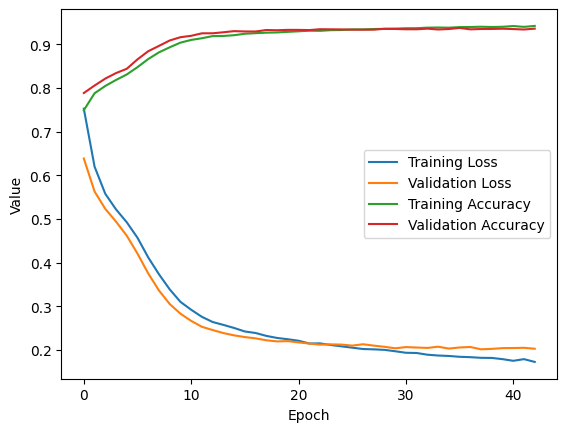

540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9376 - loss: 0.1997
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Test Accuracy: 0.9361
Test F1 Score: 0.9391


In [21]:

early_stop = EarlyStopping(monitor='val_loss', patience=5)
f1_callback = F1Score(validation_data=(x_test, y_test))

history = best_model.fit(x_train, y_train, epochs=200, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stop, f1_callback])


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
y_pred = np.argmax(best_model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
test_f1 = f1_score(y_true, y_pred, average='macro')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


In [22]:
print(f"Neural Networks Test Accuracy: {test_accuracy:.4f}")
print(f"Neural Networks Test F1 Score: {test_f1:.4f}")

Neural Networks Test Accuracy: 0.9361
Neural Networks Test F1 Score: 0.9391


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

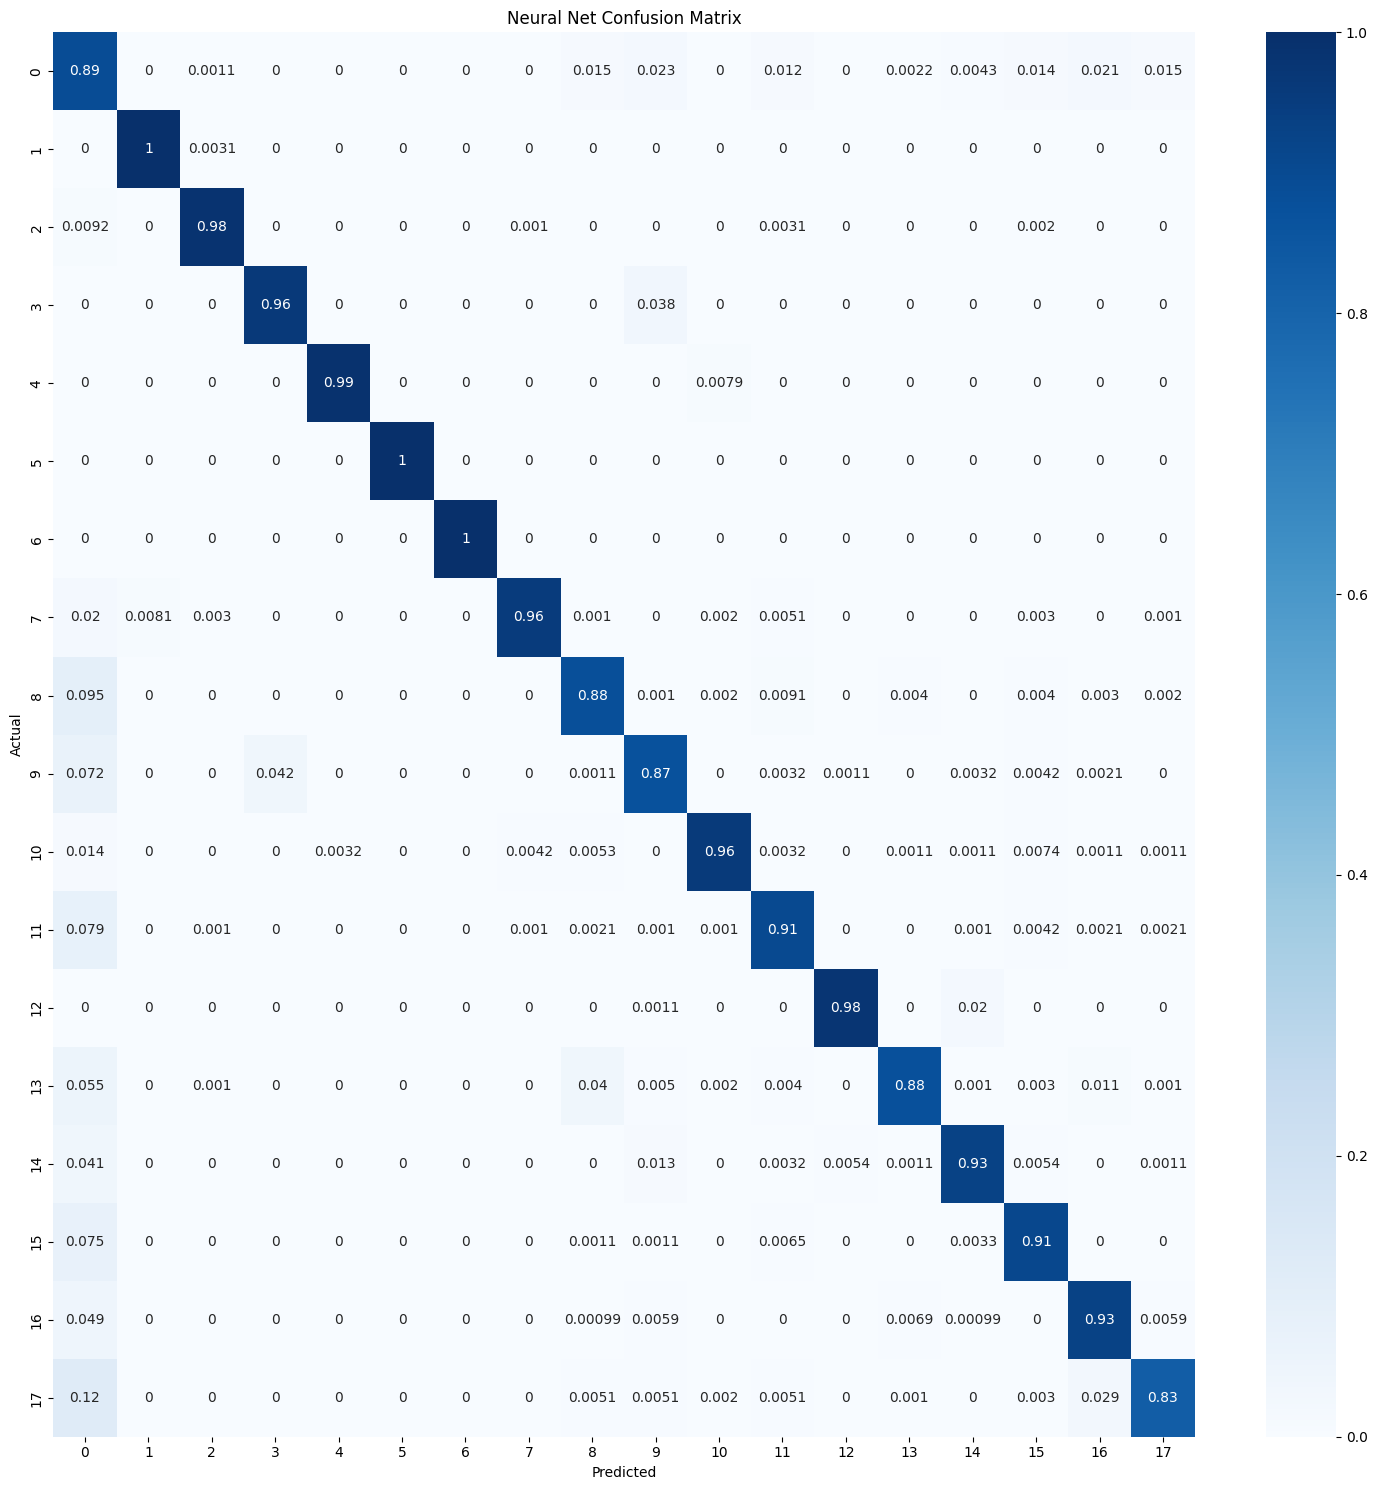

Neural Net accuracy_score: 0.9360532407407407


In [24]:
def plot_confusion_matrix(y_true, y_pred, title):
    f, ax = plt.subplots(figsize=(15, 15))
    cm = confusion_matrix(y_true, y_pred,normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues',ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_ylim(len(cm), 0)
    plt.tight_layout()
    plt.show()

y_pred = enc.inverse_transform(best_model.predict(x_test, verbose=0))
y_true = enc.inverse_transform(y_test)
    
# Plot the confusion matrix and print the f1 score for each algorithm
plot_confusion_matrix(y_true, y_pred, 'Neural Net Confusion Matrix')
print("Neural Net accuracy_score:", accuracy_score(y_true, y_pred))

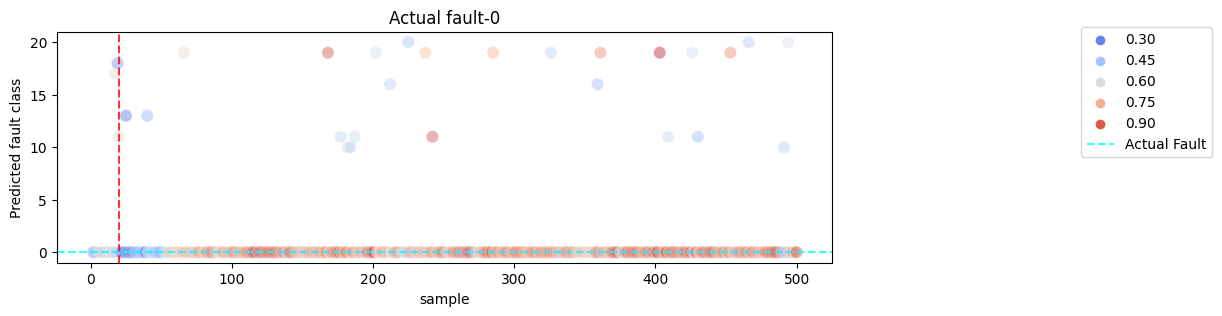

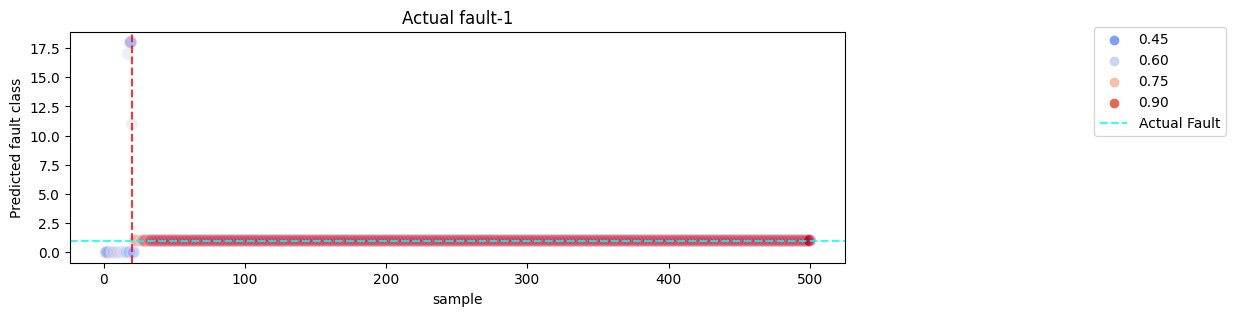

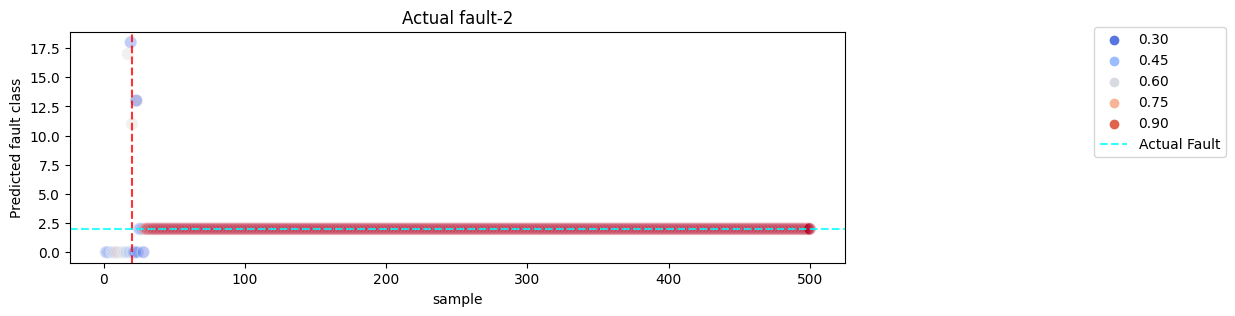

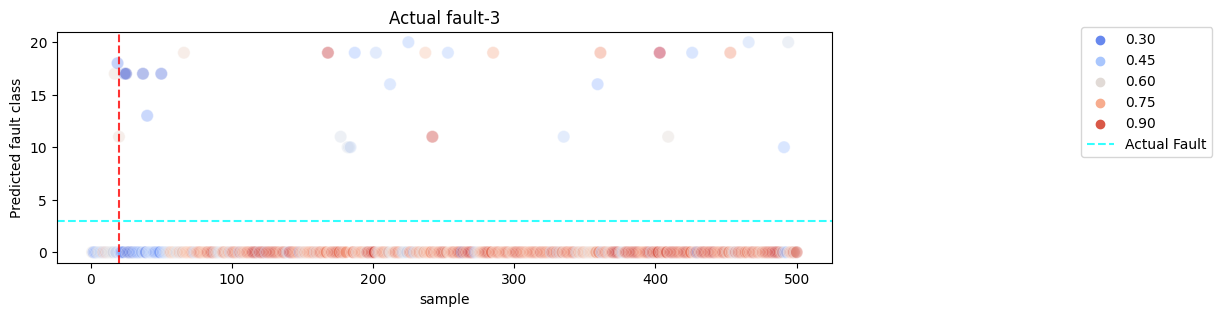

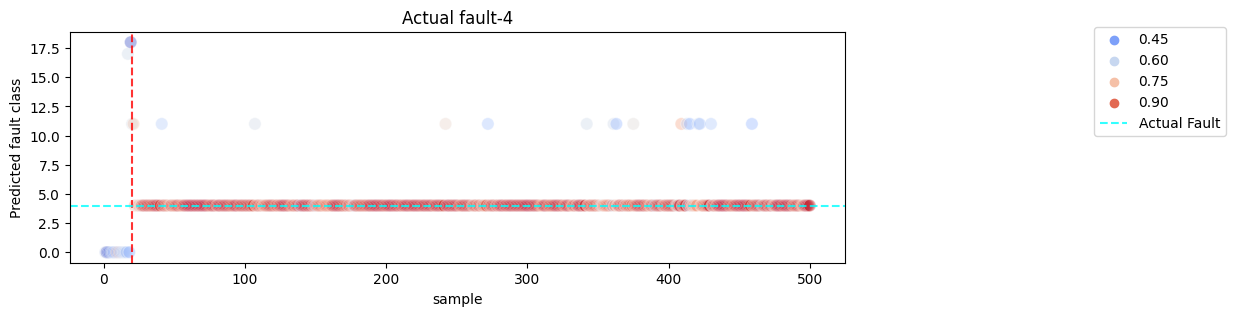

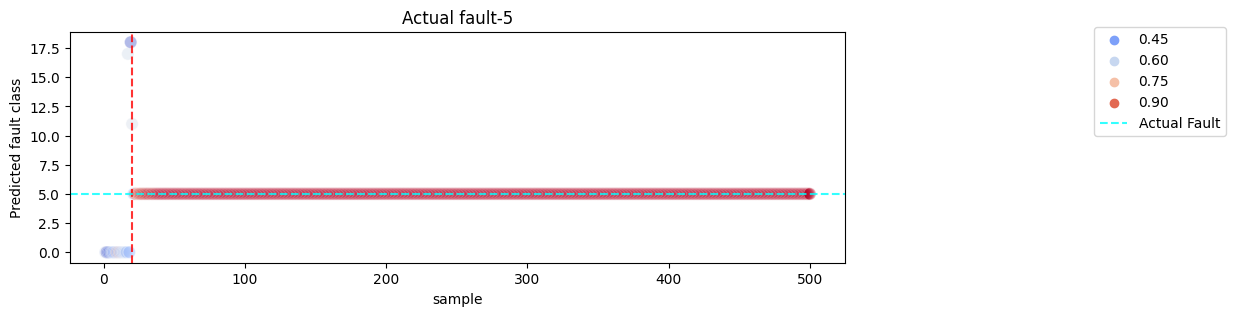

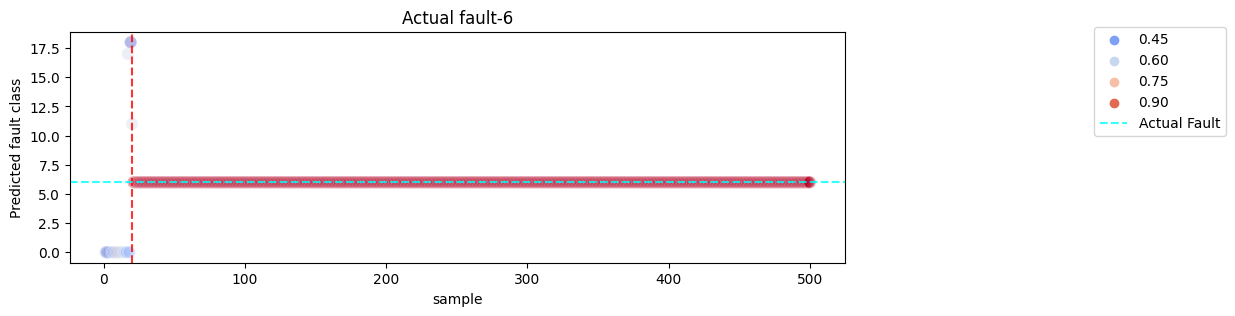

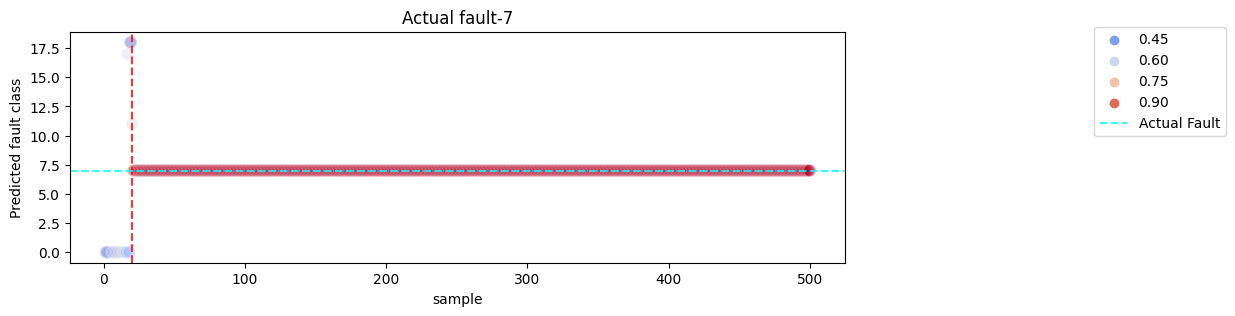

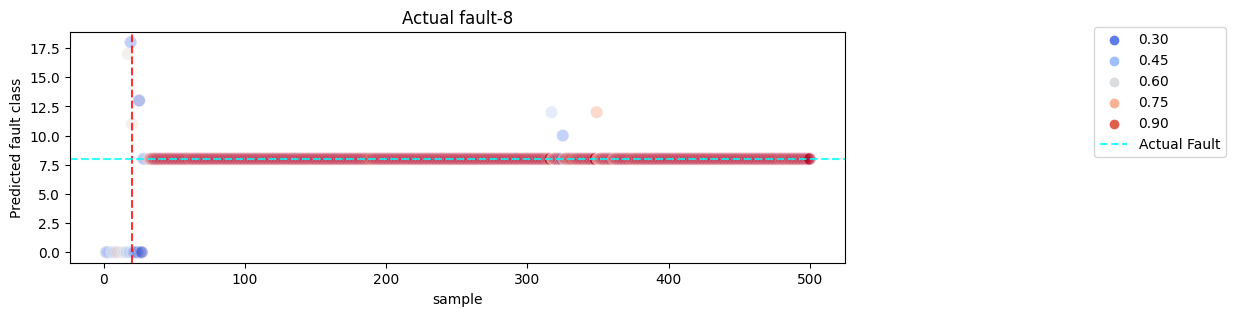

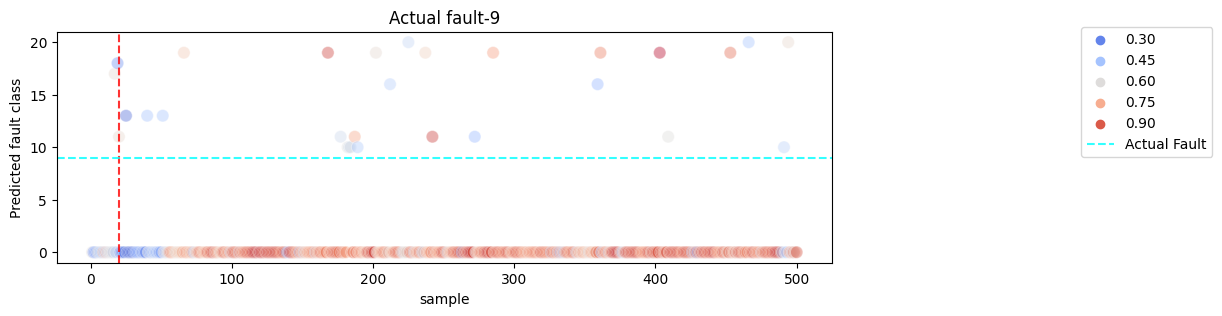

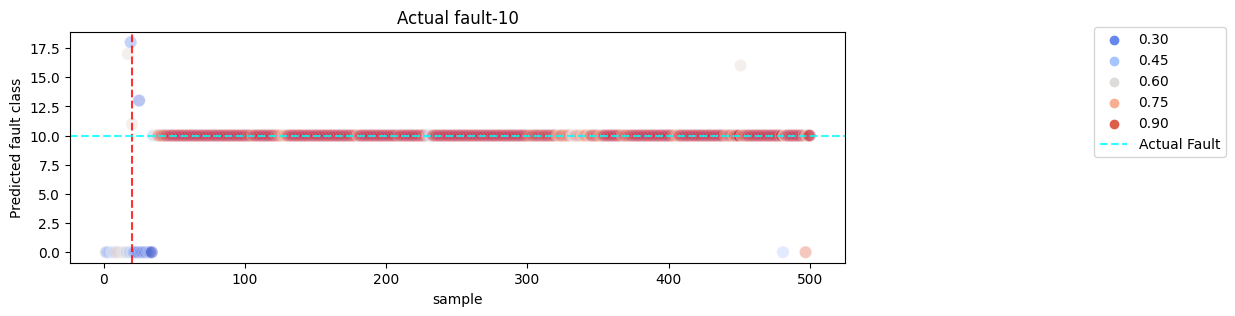

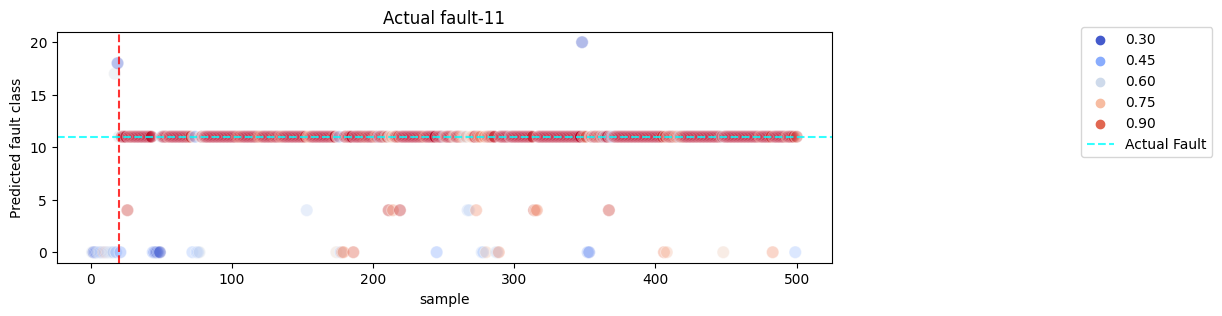

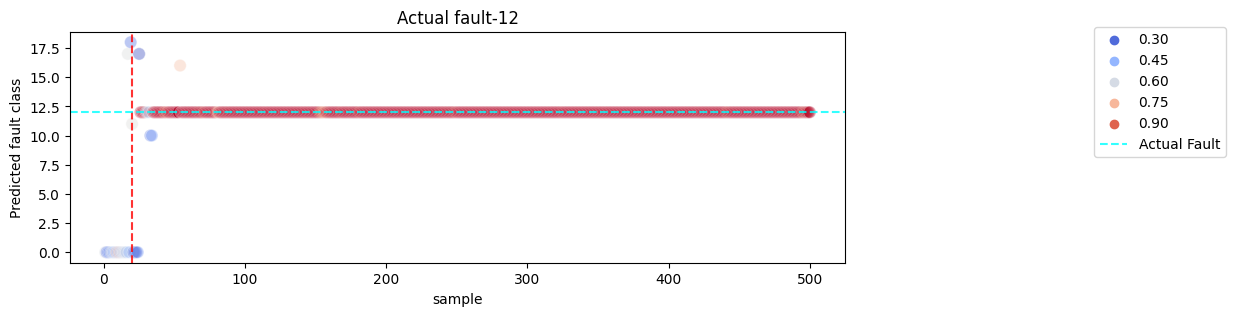

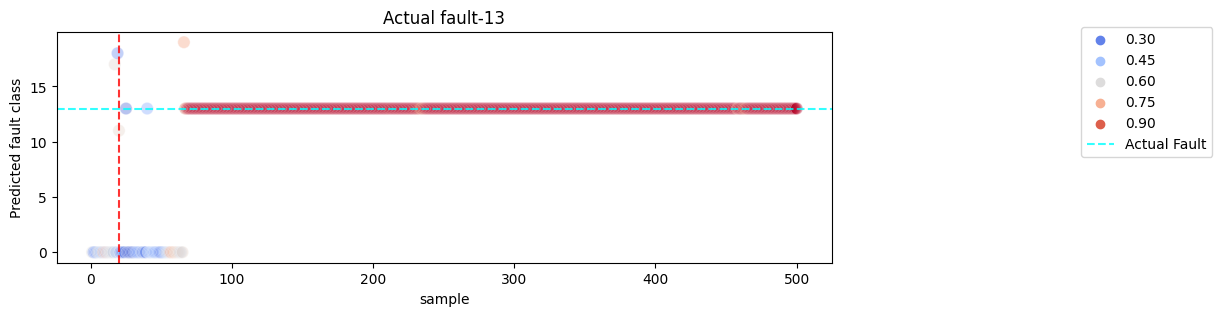

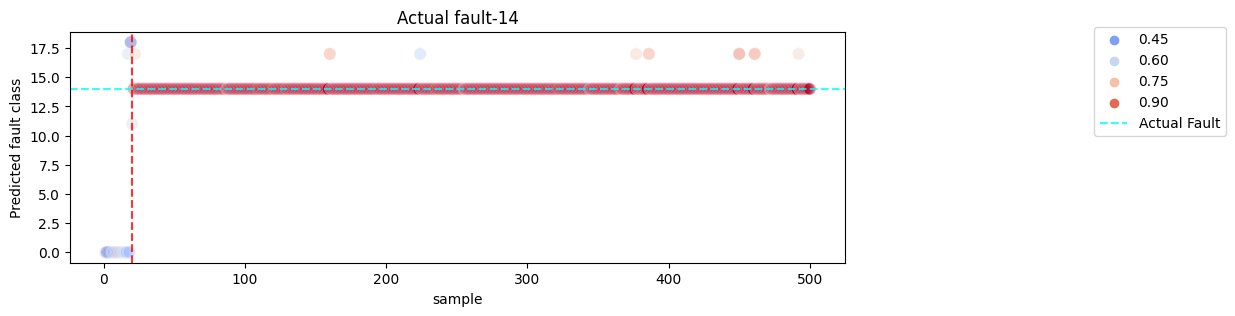

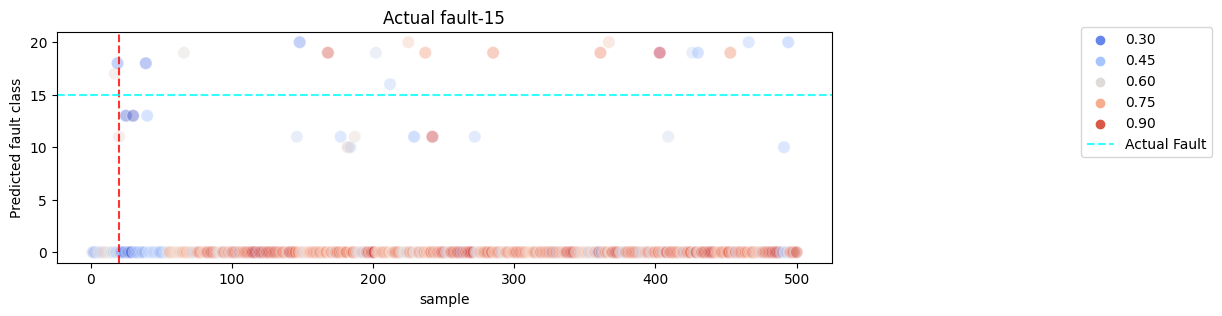

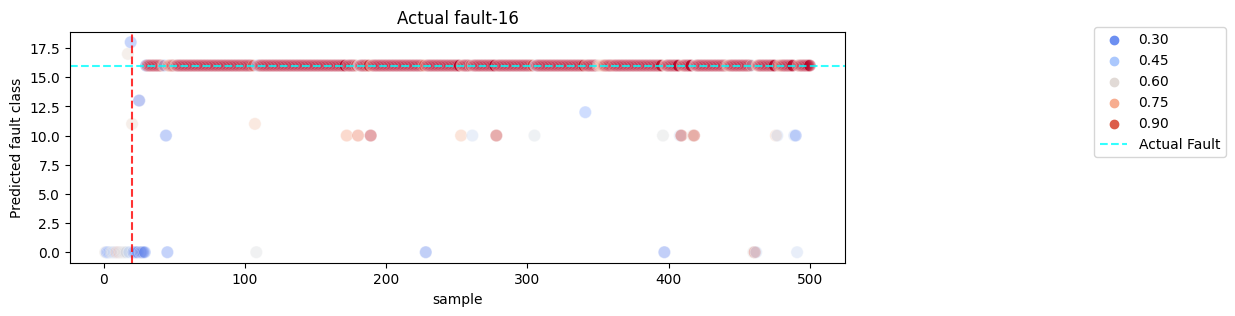

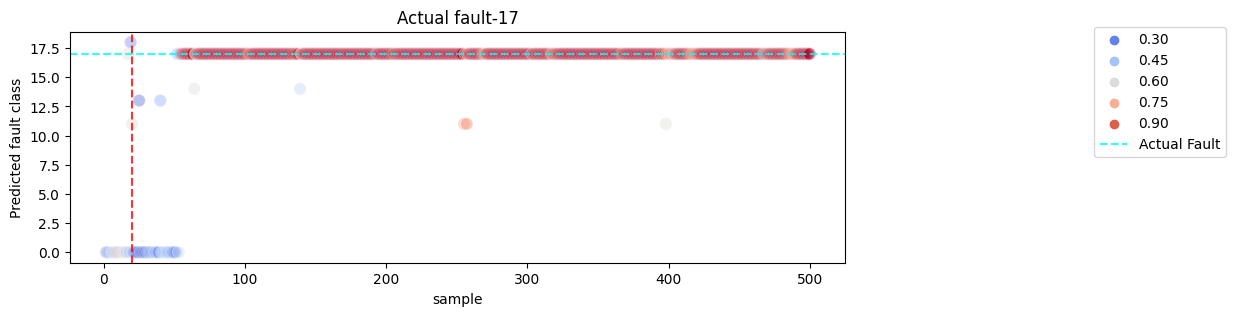

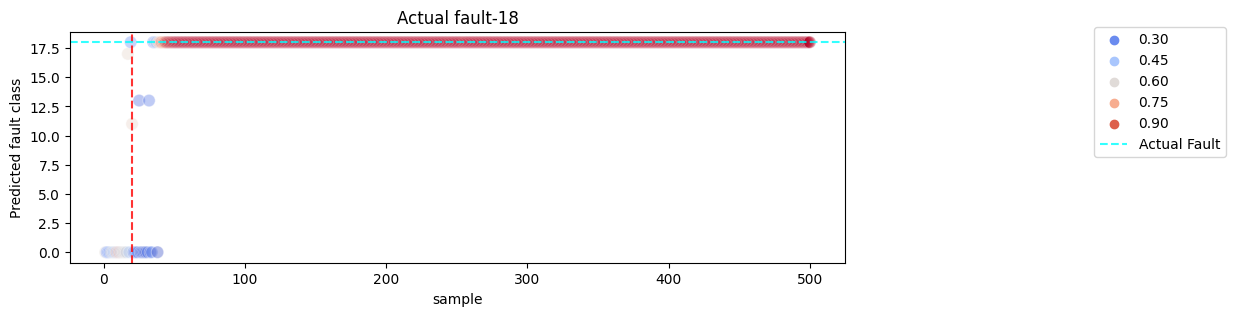

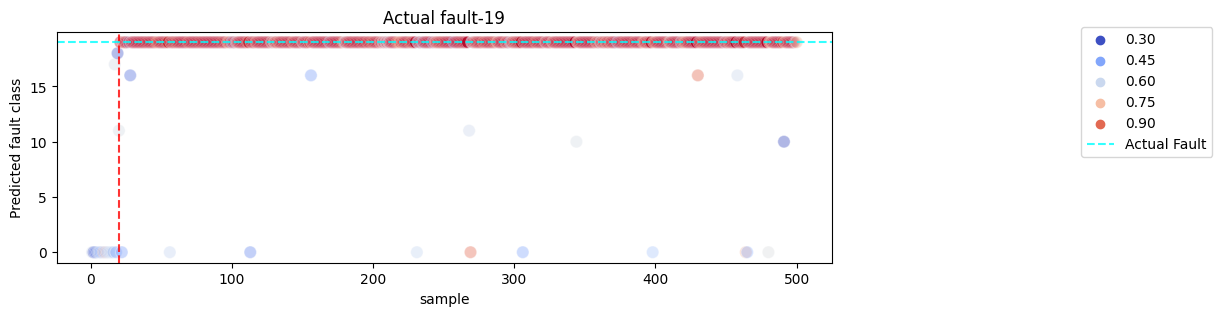

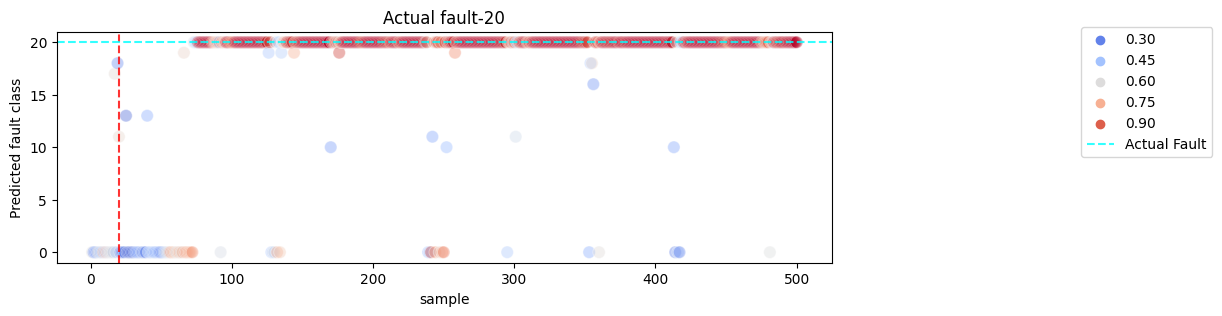

In [26]:
for F_num in range(0,21):
    df_new= DF[(DF['faultNumber']==F_num) & (DF['simulationRun']==2)].copy()
    x_new = df_new.iloc[:,3:]
    x_new.drop(columns=to_remove,inplace=True)
    x_new = sc.transform(x_new)

    y_pred = enc.inverse_transform(best_model.predict(x_new, verbose=0))
    y_proba = np.max(best_model.predict(x_new, verbose=0),axis=1)

    f, ax = plt.subplots(figsize=(10,3))
    
    sns.scatterplot(x=df_new['sample'],y=y_pred[:,0],hue=y_proba,palette="coolwarm",s=80,alpha=0.4)
    
    plt.axvline(20,c='r',alpha=0.8,linestyle ='--')
    plt.axhline(F_num,c='cyan',alpha=0.8,label='Actual Fault',linestyle ='--')
    plt.legend(bbox_to_anchor=(1.5, 1.05))
    plt.ylabel('Predicted fault class')
    plt.title(f'Actual fault-{F_num}')
    plt.show()

In [28]:
Accuracy=[]
for Fnum in [x for x in range(0,21) if x not in [3,9,15]]:

    temp_df = DF[ (DF['faultNumber']==Fnum) & (DF['sample']>20) & (DF['simulationRun']==np.random.randint(1,500))]
    temp_df.drop(columns=to_remove,inplace=True)
    X_faulty = sc.transform(temp_df.iloc[:,3:])
    y_true = temp_df['faultNumber']
    
    y_pred = enc.inverse_transform(best_model.predict(X_faulty, verbose=0))
    
    
    acc = accuracy_score(y_true, y_pred)
    print(f'The accuracy for Fault_num={Fnum} is {acc}')
    
    Accuracy.append(acc)

C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)
C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)
C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp

The accuracy for Fault_num=0 is 0.8729166666666667
The accuracy for Fault_num=1 is 0.9958333333333333
The accuracy for Fault_num=2 is 0.9854166666666667
The accuracy for Fault_num=4 is 0.9583333333333334
The accuracy for Fault_num=5 is 0.9958333333333333


C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)
C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)
C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp

The accuracy for Fault_num=6 is 1.0
The accuracy for Fault_num=7 is 1.0


C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)
C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)
C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp

The accuracy for Fault_num=8 is 0.8083333333333333
The accuracy for Fault_num=10 is 0.7354166666666667


C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)
C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)


The accuracy for Fault_num=11 is 0.81875
The accuracy for Fault_num=12 is 0.9270833333333334


C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)
C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)


The accuracy for Fault_num=13 is 0.8979166666666667
The accuracy for Fault_num=14 is 0.9729166666666667


C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)
C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)
C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp

The accuracy for Fault_num=16 is 0.88125
The accuracy for Fault_num=17 is 0.8625
The accuracy for Fault_num=18 is 0.8979166666666667
The accuracy for Fault_num=19 is 0.9291666666666667
The accuracy for Fault_num=20 is 0.8666666666666667
####################
The overall accuracy is 0.9114583333333334


C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)
C:\Users\Samarth\AppData\Local\Temp\ipykernel_13984\3936531310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=to_remove,inplace=True)


In [29]:

print(f'The overall accuracy is {np.mean(Accuracy)}')

####################
The overall accuracy is 0.9114583333333334


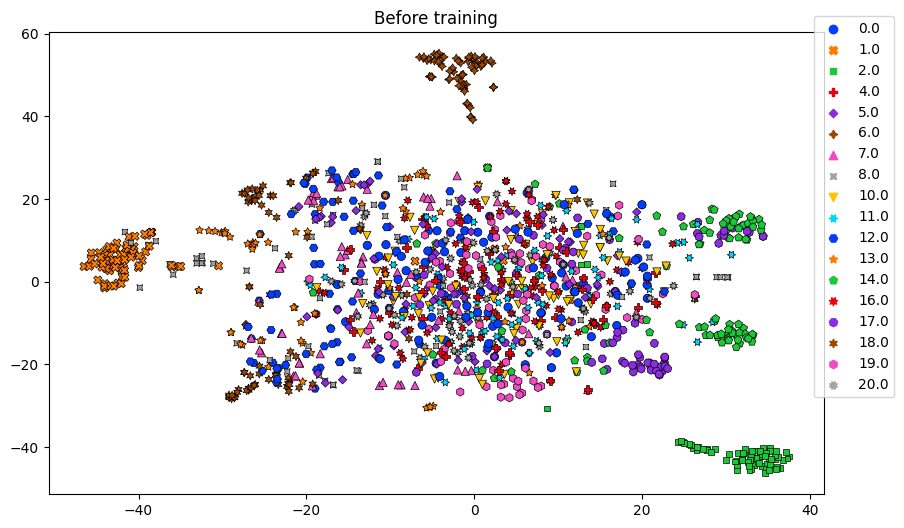

In [36]:
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components=2, learning_rate='auto',init='random',random_state=42).fit_transform(x_train[::50,:])
y_label = enc.inverse_transform(y_train[::50,:]).reshape(-1)

# Create a scatter plot of the embedded data, colored by the true labels
f, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x=x_embedded[:,0],y=x_embedded[:,1],hue=y_label,style=y_label,palette="bright",edgecolor='black')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Before training')
plt.show()

In [31]:
from tensorflow.keras import Model

intermediate_model = Model(inputs=best_model.input,outputs=best_model.layers[-2].output)
intermediate_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 352)            │        45,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 352)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,296 (200.38 KB)

 Trainable params: 51,296 (200.38 KB)

 Non-trainable params: 0 (0.00 B)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step


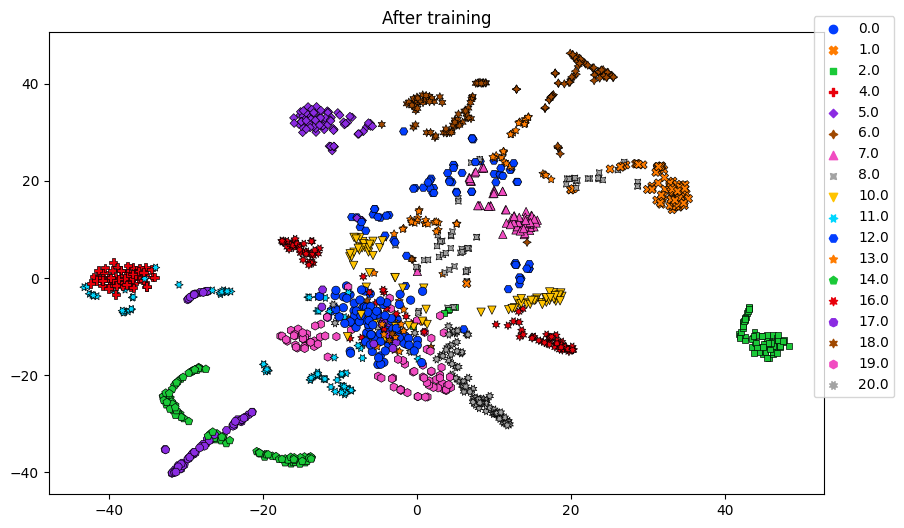

In [37]:
x_inter = intermediate_model.predict(x_train[::50,:])

x_embedded = TSNE(n_components=2, learning_rate='auto',init='random',random_state=42).fit_transform(x_inter)
y_label = enc.inverse_transform(y_train[::50,:]).reshape(-1)

# Create a scatter plot of the embedded data, colored by the true labels
f, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x=x_embedded[:,0],y=x_embedded[:,1],hue=y_label,style=y_label,palette="bright",edgecolor='black')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('After training')
plt.show()

**CNN**

In [62]:
correlation_threshold = 0.95

corr = DF[DF['simulationRun']==1].iloc[:,3:].corr()
corr_matrix = corr.abs()


high_corr_pairs = np.where(corr_matrix > correlation_threshold)


high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y])
                   for x, y in zip(*high_corr_pairs) if x != y]

to_remove = set()


for feature1, feature2 in high_corr_pairs:
    if feature1 not in to_remove and feature2 not in to_remove:
        
        correlation_value = corr_matrix.loc[feature1, feature2]
        print(f"Highly correlated pair: {feature1}, {feature2} (Correlation: {correlation_value:.2f})")

    
        to_remove.add(feature2)
        print(f"Removing: {feature2}")


reduced_data = DF.drop(columns=to_remove)

print(f"Total number of removed features: {len(to_remove)}")


print("Removed features:", to_remove)


Highly correlated pair: Reactor_pressure, Separator_pressure (Correlation: 1.00)
Removing: Separator_pressure
Highly correlated pair: Reactor_pressure, Stripper_pressure (Correlation: 0.99)
Removing: Stripper_pressure
Highly correlated pair: Separator_level, Separator_pot_liquid_flow_valve (Correlation: 1.00)
Removing: Separator_pot_liquid_flow_valve
Highly correlated pair: Stripper_level, Stripper_liquid_product_flow_valve (Correlation: 1.00)
Removing: Stripper_liquid_product_flow_valve
Highly correlated pair: Composition_of_A_rxtr_feed, Composition_of_A_purge (Correlation: 0.98)
Removing: Composition_of_A_purge
Highly correlated pair: Composition_of_C_rxtr_feed, Composition_of_C_purge (Correlation: 0.99)
Removing: Composition_of_C_purge
Highly correlated pair: Composition_of_F_rxtr_feed, Composition_of_F_purge (Correlation: 0.96)
Removing: Composition_of_F_purge
Total number of removed features: 7
Removed features: {'Composition_of_C_purge', 'Stripper_liquid_product_flow_valve', 'Sep

In [63]:
def SlidingWindow(df,w,s):
    X=[]
    Y=[]
    for i in range(0,len(df)-w,s):
        x = np.array(df.iloc[i:i+w,3:])
        y = np.array(df.iloc[i+w-1,0])
        X.append(x)
        Y.append(y)

    X=np.array(X)
    Y=np.array(Y)

    return X,Y
w=20
s=10

X=[]
Y=[]

for j in [x for x in range(0,21) if x not in [3,9,15]]:
    for i in range(1,10):
        df = reduced_data[(reduced_data['faultNumber']==j) & (reduced_data['simulationRun']==i) & (reduced_data['sample']>20)]
        
        x_temp,y_temp = SlidingWindow(df,w,s)
        X.append(x_temp)
        Y.append(y_temp)
    
X=np.array(X).reshape((-1,w,x_temp.shape[-1]))
Y=np.array(Y).reshape((-1))

In [64]:
X.shape

(7452, 20, 45)

In [65]:
# Initialize a StandardScaler object
sc = StandardScaler()

# Filter the DataFrame to only include data from the first simulation run
reduced_data = reduced_data[reduced_data['simulationRun']==1]
# Select the rows from the reduced dataset that have faultNumber equal to 0, and extract the feature values
fault_free = reduced_data[(reduced_data['faultNumber'] == 0)].iloc[:, 3:]

# Fit the StandardScaler object to the feature values of the fault-free data
sc.fit(fault_free)

StandardScaler()

In [66]:
X_sc = sc.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
enc = OneHotEncoder(sparse=False)

# Fit the OneHotEncoder to the target values Y, which must be reshaped to have a single column
enc.fit(Y.reshape(-1, 1))

# Transform the target values Y to one-hot encoded form, by applying the OneHotEncoder to the reshaped Y array
Y_enc = enc.transform(Y.reshape(-1, 1))

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [68]:
np.unique(Y)

array([ 0.,  1.,  2.,  4.,  5.,  6.,  7.,  8., 10., 11., 12., 13., 14.,
       16., 17., 18., 19., 20.])

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X_sc, Y_enc, test_size=0.2, random_state=42)

In [70]:
y_train.shape

(5961, 18)

In [79]:
x_train.shape[2]

45

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Flatten, Dropout
from keras_tuner import HyperModel
from keras_tuner import RandomSearch

# Define the model as a hypermodel for Keras Tuner
class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        input_layer = Input(shape=self.input_shape)

        # Hyperparameters for convolutional layers
        filters = hp.Int('filters', min_value=32, max_value=128, step=16)
        kernel_size = hp.Choice('kernel_size', values=[3, 5])
        conv_activation = hp.Choice('conv_activation', values=['relu', 'tanh'])

        # Encoder layers with tunable parameters
        encoded = Conv1D(filters=filters, kernel_size=kernel_size, activation=conv_activation)(input_layer)
        encoded = Conv1D(filters=filters, kernel_size=kernel_size, activation=conv_activation)(encoded)

        encoded = Flatten()(encoded)

        # Tunable fully connected layer
        dense_units = hp.Int('dense_units', min_value=64, max_value=256, step=64)
        decoded = Dense(units=dense_units, activation='relu')(encoded)

        # Tunable dropout rate
        dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.6, step=0.1)
        decoded = Dropout(rate=dropout_rate)(decoded)

        # Output layer with softmax for classification
        decoded = Dense(units=self.num_classes, activation='softmax')(decoded)

        # Compile the model
        model = Model(inputs=input_layer, outputs=decoded)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        return model

# Function to perform hyperparameter search
def CNN_model_tuner(X_train, y_train, X_val, y_val):
    input_shape = (X_train.shape[1], X_train.shape[2])
    num_classes = y_train.shape[1]

    hypermodel = CNNHyperModel(input_shape=input_shape, num_classes=num_classes)

    # Define tuner
    tuner = RandomSearch(
        hypermodel,
        objective='val_accuracy',
        max_trials=10,  # number of different models to try
        executions_per_trial=2,  # number of times to train each model
        directory='cnn_hyperparameter_tuning1',
        project_name='cnn_tuning'
    )

    # Perform hyperparameter search
    tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

    # Get the best model and hyperparameters
    best_model = tuner.get_best_models(num_models=1)[0]
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

    return best_model,best_hyperparameters


Trial 10 Complete [00h 00m 28s]
val_accuracy: 0.9450033605098724

Best val_accuracy So Far: 0.9674714803695679
Total elapsed time: 00h 04m 19s


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 20, 45)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 18, 80)         │        10,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 16, 80)         │        19,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,314 (442.63 KB)

 Trainable params: 113,314 (442.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9709 - loss: 0.0969 - val_accuracy: 0.9678 - val_loss: 0.1156
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9702 - loss: 0.1090 - val_accuracy: 0.9671 - val_loss: 0.1160
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9746 - loss: 0.0848 - val_accuracy: 0.9691 - val_loss: 0.1151
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9801 - loss: 0.0681 - val_accuracy: 0.9678 - val_loss: 0.1113
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9799 - loss: 0.0862 - val_accuracy: 0.9618 - val_loss: 0.1222
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9828 - loss: 0.0594 - val_accuracy: 0.9651 - val_loss: 0.1196
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9825 - loss: 0.0616 - val_accuracy: 0.9665 - val_loss: 0.1212
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9872 - loss: 0.0474 - val_accuracy: 0.9631 - val_loss:

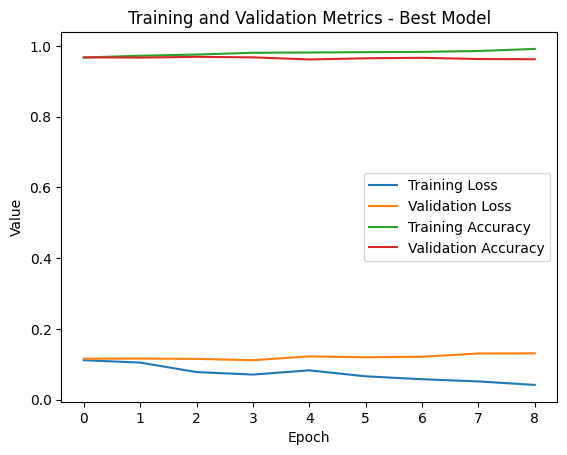

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1 Score for Best Model: 0.9631


In [81]:

best_model, best_hyperparameters = CNN_model_tuner(x_train, y_train, x_test, y_test)
best_model.summary()

# Train the best model with early stopping
history_best = best_model.fit(x_train[::5, :], y_train[::5], epochs=200, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stop])

# Plot the training history for loss and accuracy for the best model
plt.plot(history_best.history['loss'], label='Training Loss')
plt.plot(history_best.history['val_loss'], label='Validation Loss')
plt.plot(history_best.history['accuracy'], label='Training Accuracy')
plt.plot(history_best.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.title('Training and Validation Metrics - Best Model')
plt.show()

# Calculate F1 Score for the best model on validation data
y_pred_best = best_model.predict(x_test)
y_pred_best_classes = np.argmax(y_pred_best, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

f1_best = f1_score(y_test_classes, y_pred_best_classes, average='weighted')
print(f"F1 Score for Best Model: {f1_best:.4f}")


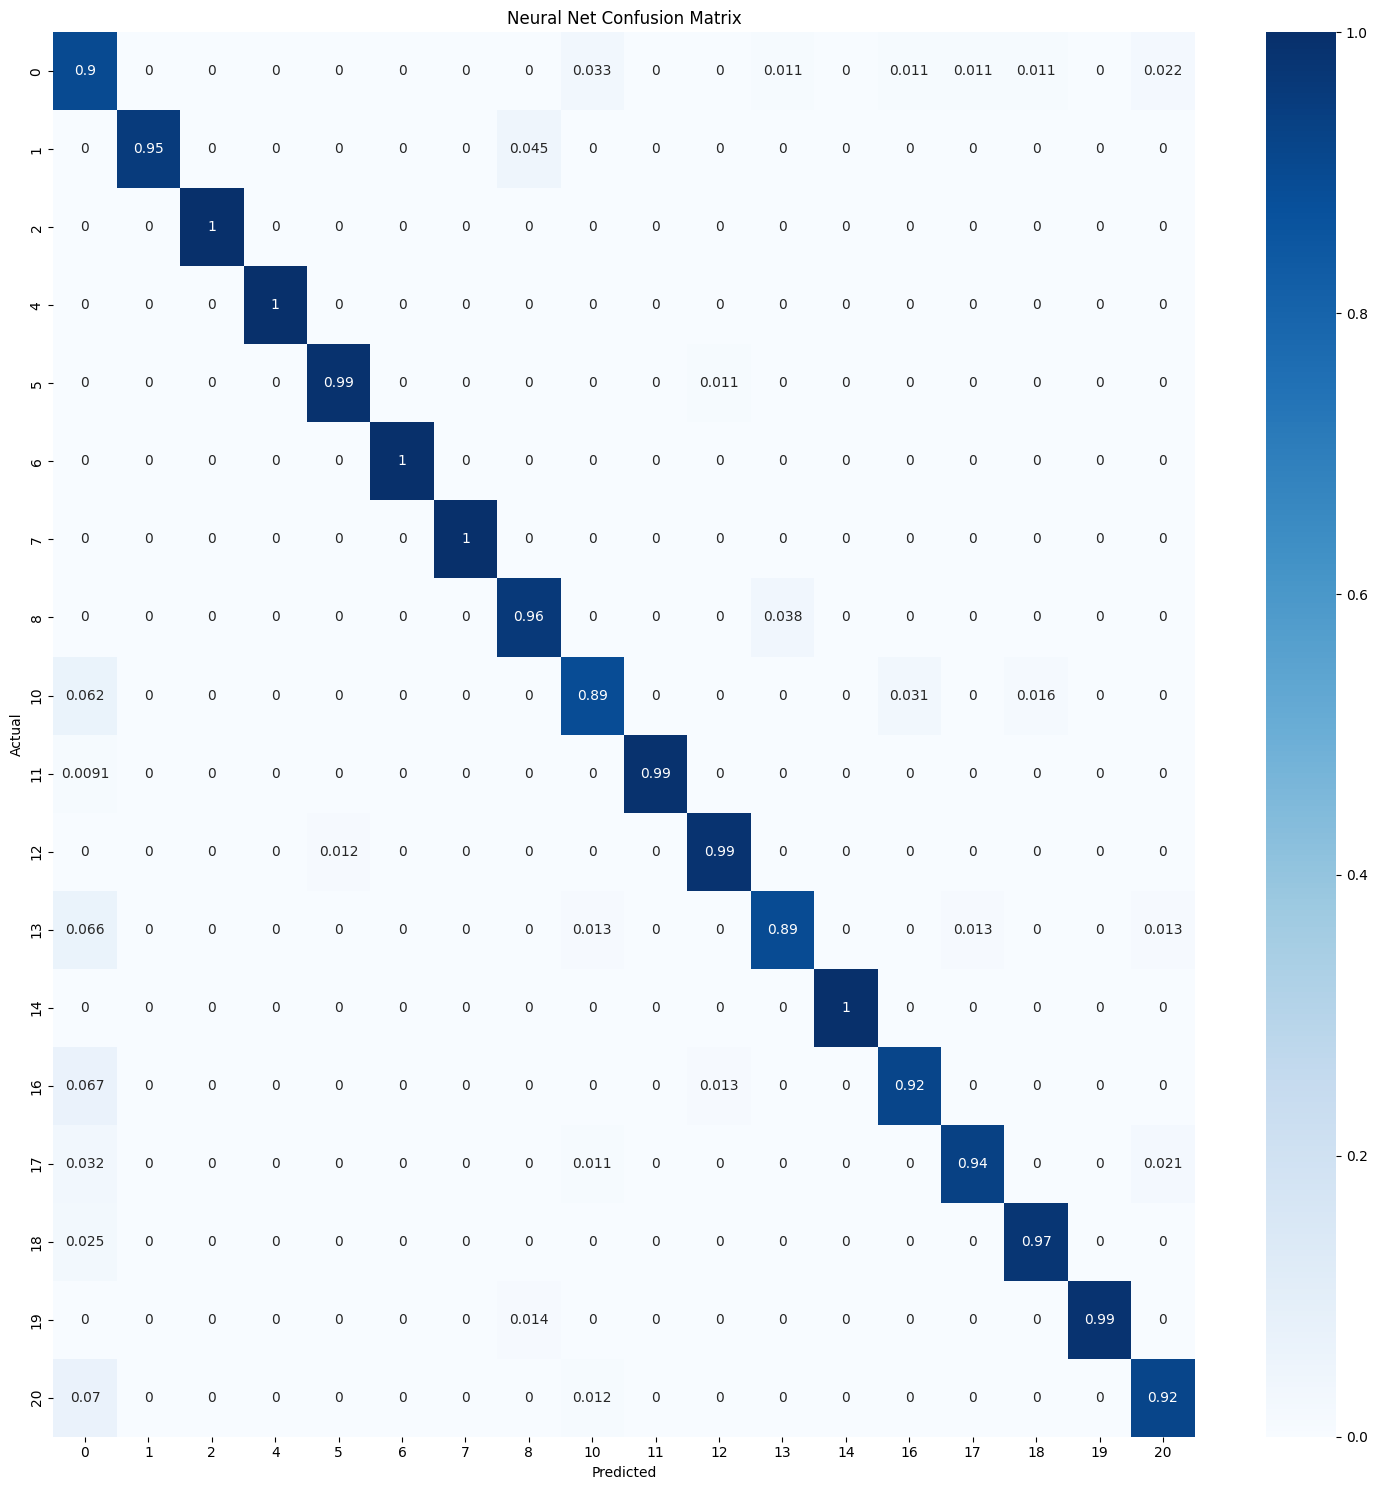

CNN accuracy_score: 0.9624413145539906


In [82]:
def plot_confusion_matrix(y_true, y_pred, title):
    f, ax = plt.subplots(figsize=(15, 15))
    cm = confusion_matrix(y_true, y_pred,normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues',ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels([str(x) for x in range(0,21) if x not in [3,9,15] ])
    ax.set_yticklabels([str(x) for x in range(0,21) if x not in [3,9,15] ])
    ax.set_ylim(len(cm), 0)
    plt.tight_layout()
    plt.show()

y_pred = enc.inverse_transform(best_model.predict(x_test, verbose=0))
y_true = enc.inverse_transform(y_test)
    
# Plot the confusion matrix and print the f1 score for each algorithm
plot_confusion_matrix(y_true, y_pred, 'Neural Net Confusion Matrix')
print("CNN accuracy_score:", accuracy_score(y_true, y_pred))

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


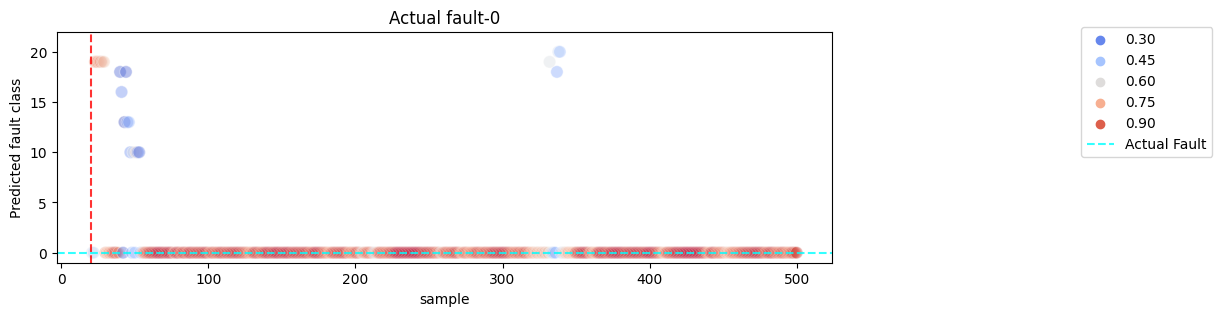

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


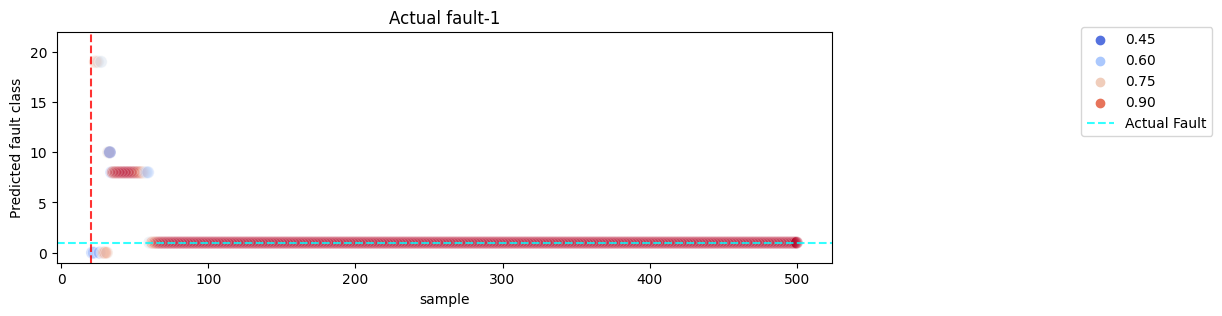

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


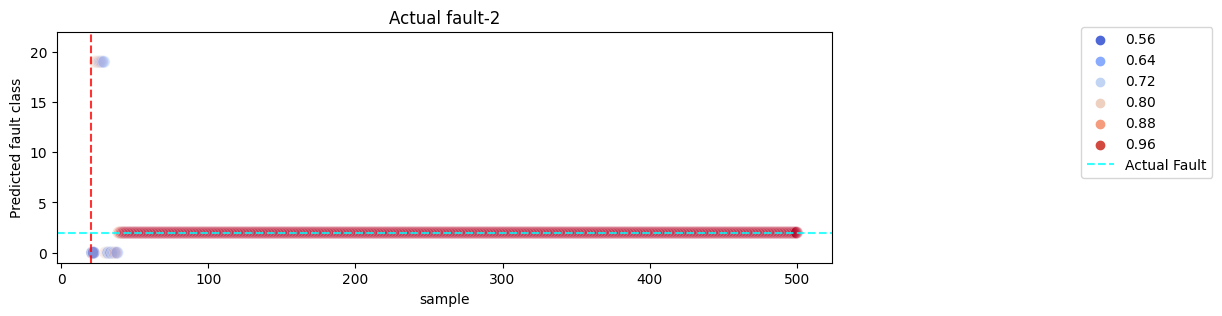

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


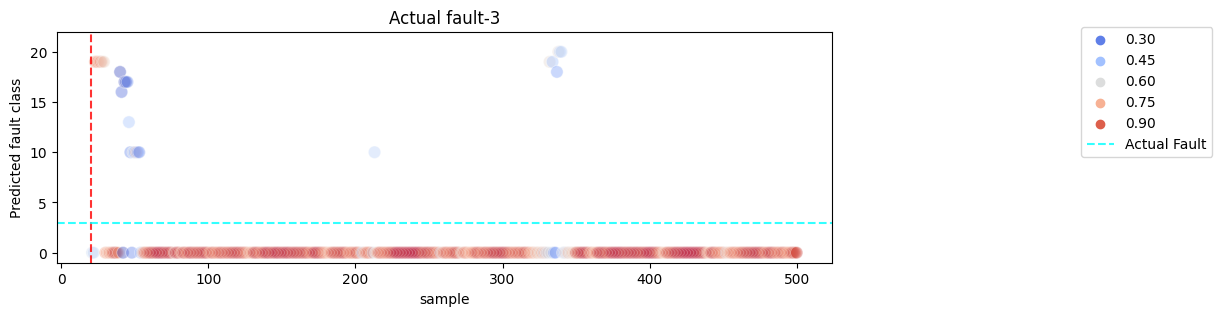

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


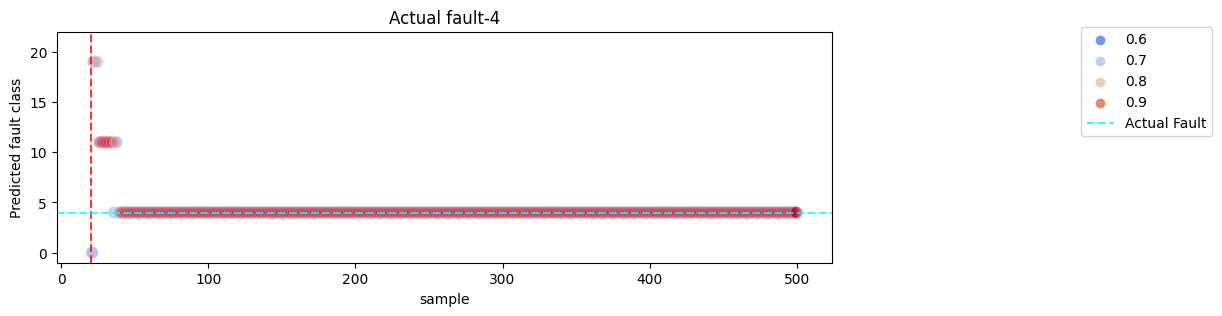

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


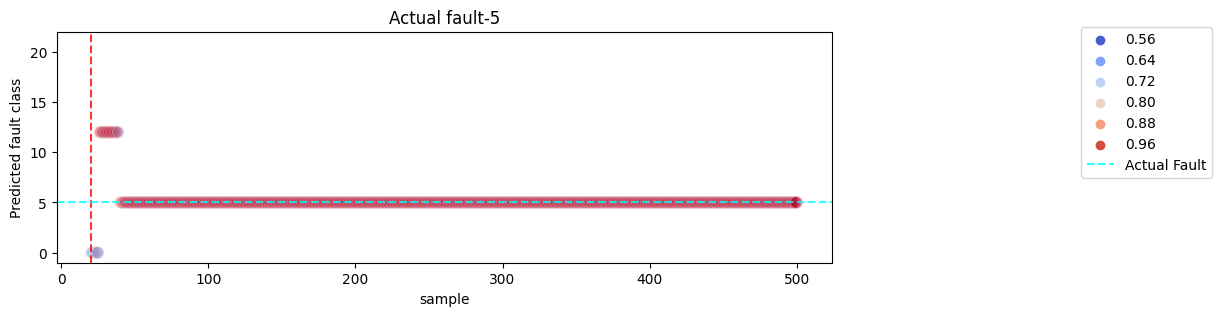

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


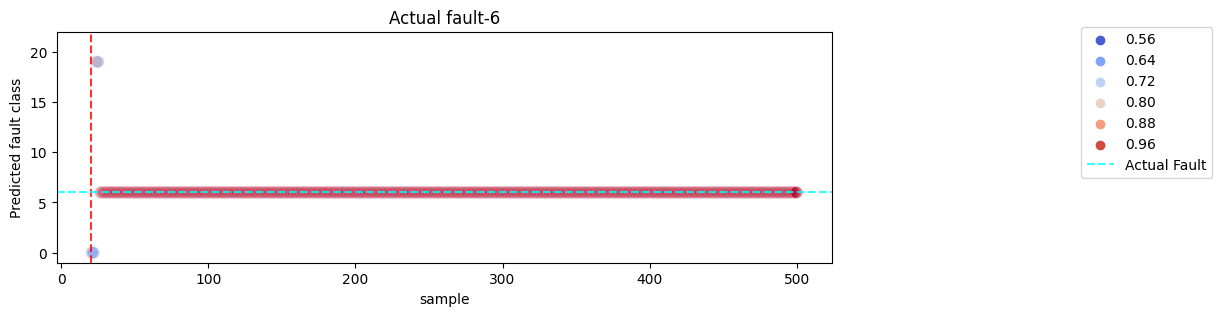

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


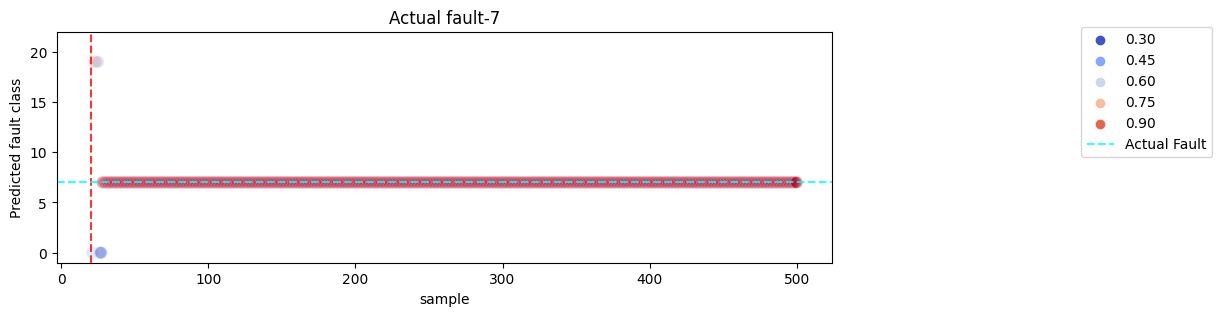

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


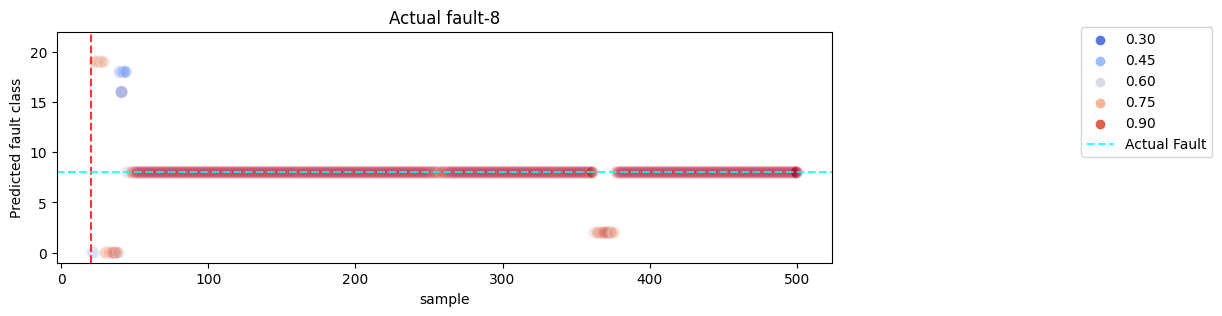

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


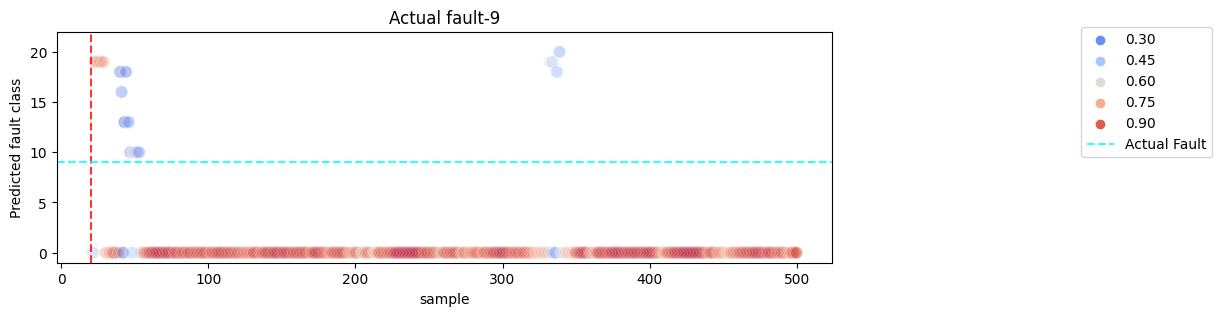

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


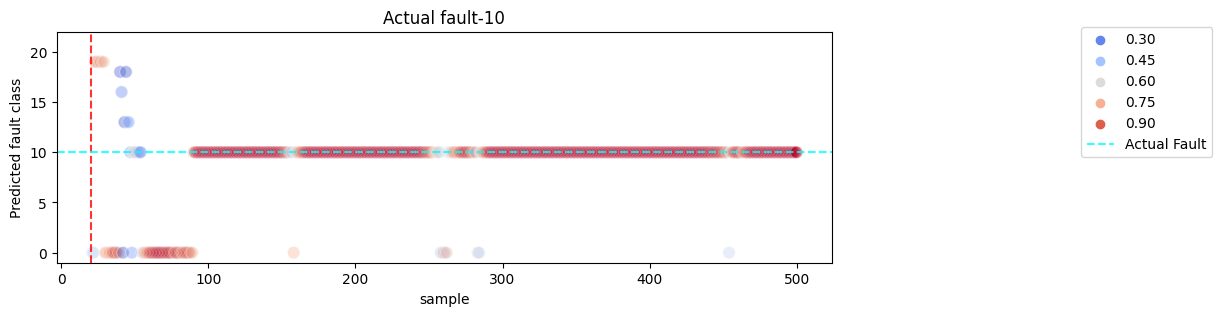

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


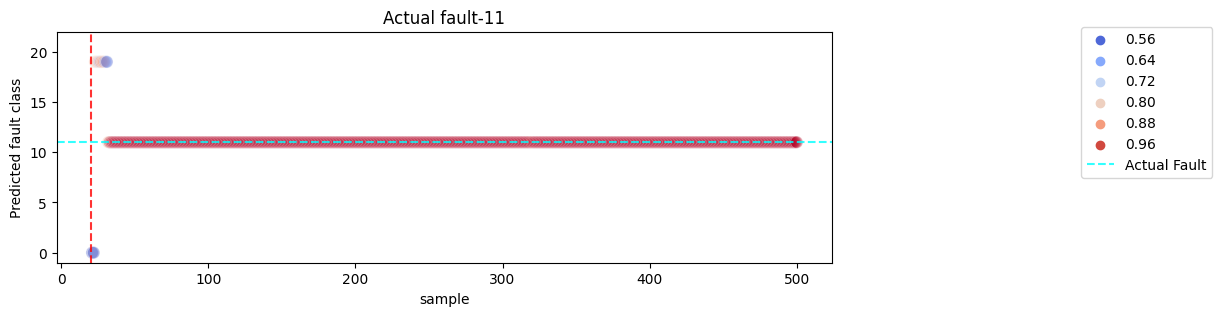

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


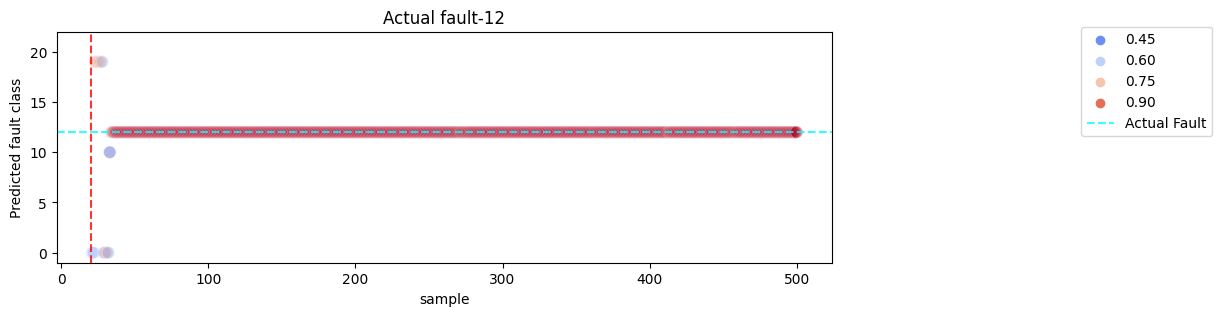

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


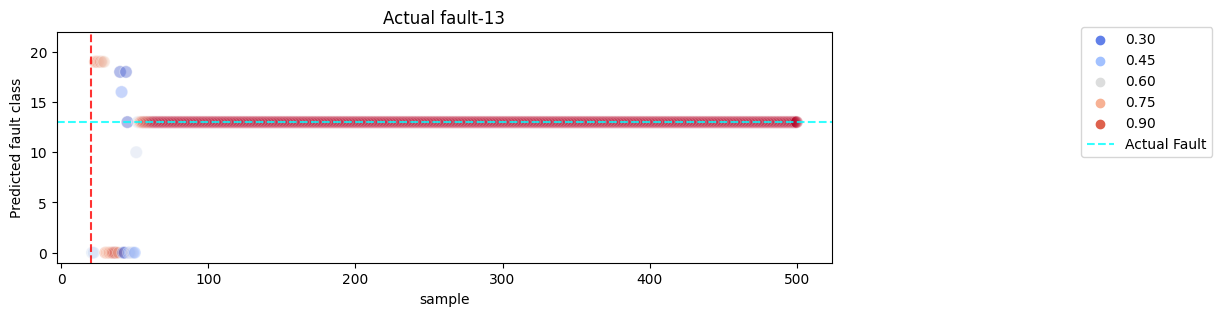

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


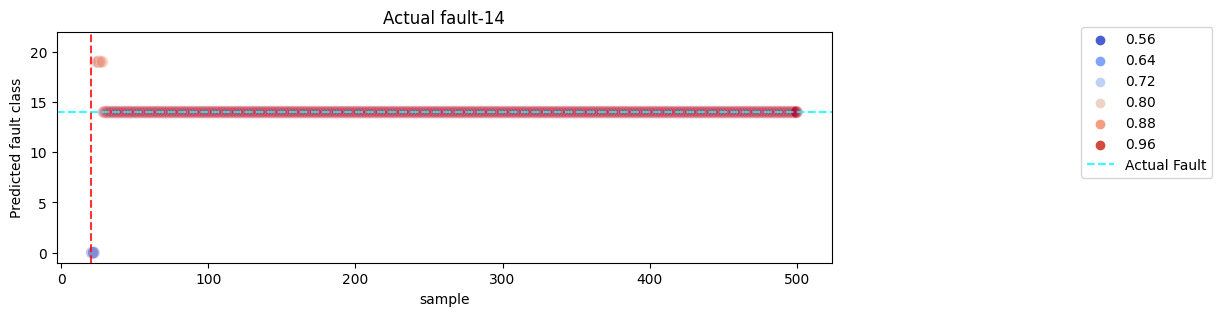

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


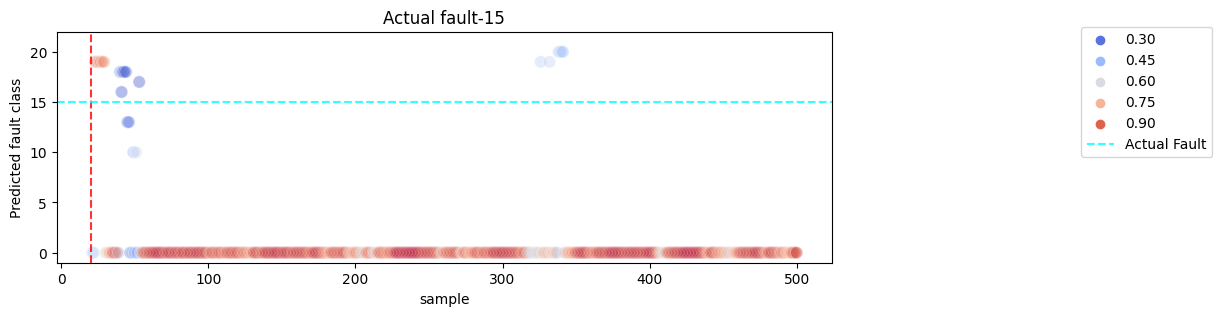

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


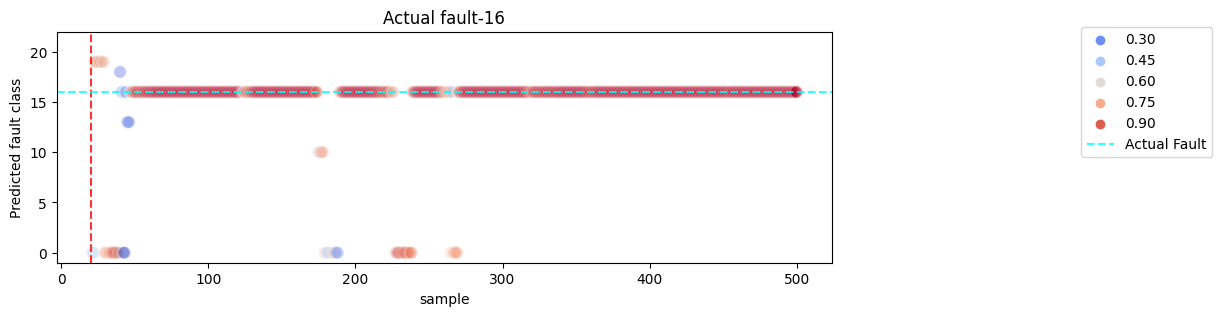

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


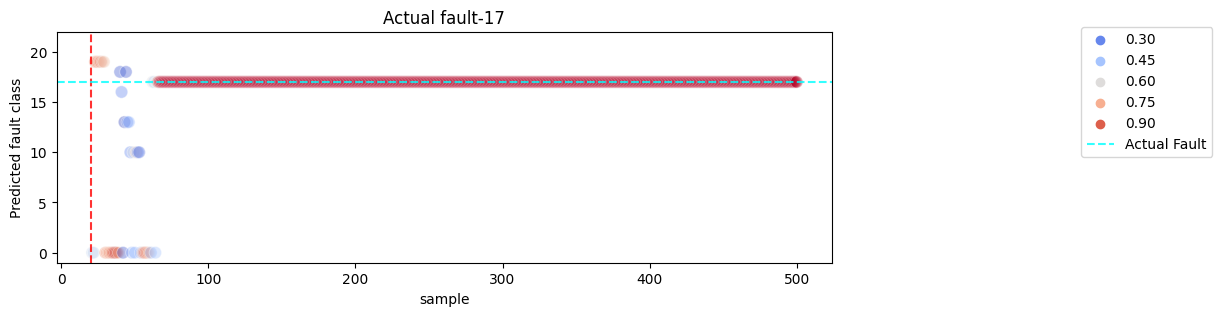

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


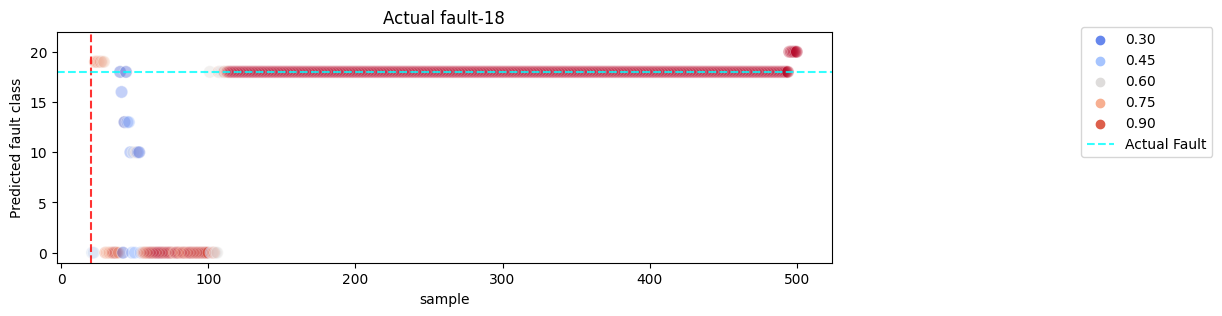

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


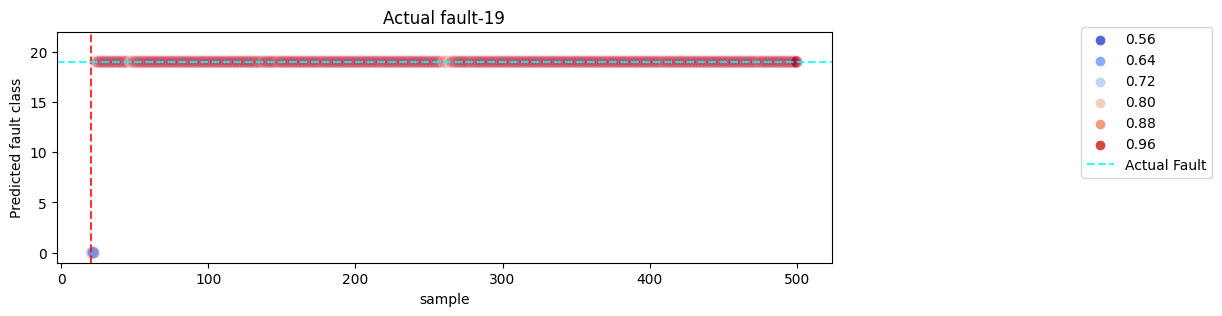

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


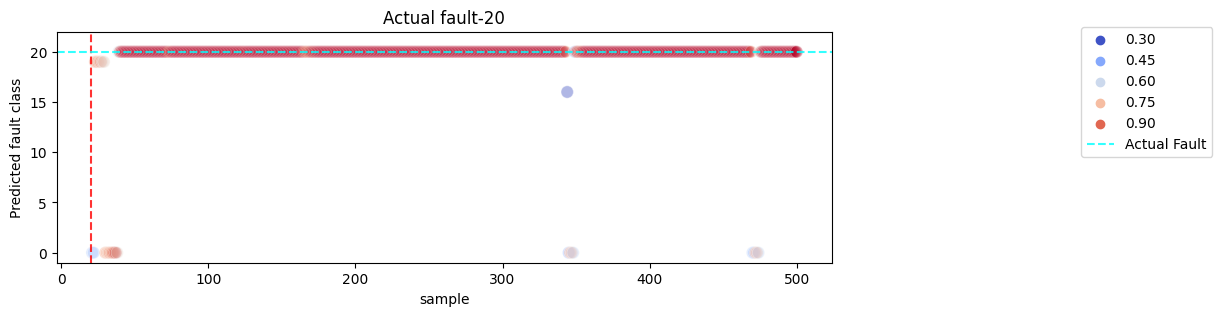

In [84]:
for F_num in range(0,21):
    # select the fault data each fault
    df_new= DF[(DF['faultNumber']==F_num) & (DF['simulationRun']==1)].copy()
    df_new.drop(columns=to_remove,inplace=True)
    df_new.iloc[:,3:] = sc.transform(df_new.iloc[:,3:])

    # create sliding window data
    x_new,y_new =  SlidingWindow(df_new,w=20,s=1)

    # predict fault class and probability for each sliding window
    y_pred = enc.inverse_transform(best_model.predict(x_new,verbose=0))
    y_proba = np.max(best_model.predict(x_new, verbose=0),axis=1)

    # plot the results
    f, ax = plt.subplots(figsize=(10,3))
    sns.scatterplot(x=df_new['sample'][w:],y=y_pred[:,0],hue=y_proba,palette="coolwarm",s=80,alpha=0.4,vmin=0, vmax=1)
    plt.axvline(20,c='r',alpha=0.8,linestyle ='--')
    plt.axhline(F_num,c='cyan',alpha=0.8,label='Actual Fault',linestyle ='--')
    plt.legend(bbox_to_anchor=(1.5, 1.05))
    plt.ylabel('Predicted fault class')
    plt.ylim([-1,22])
    plt.title(f'Actual fault-{F_num}')
    plt.show()

In [86]:
Accuracy=[]
#For each fault number in the dataset
for Fnum in [x for x in range(0,21) if x not in [3,9,15]]:
    # Get data for a random simulation run
    df_new= DF[(DF['faultNumber']==F_num) & (DF['simulationRun']==np.random.randint(1,500))].copy()
    df_new.drop(columns=to_remove,inplace=True)
    df_new.iloc[:,3:] = sc.transform(df_new.iloc[:,3:])
    
    # Generate sliding windows from data
    x_new,y_true =  SlidingWindow(df_new,w=w,s=1)
    # Predict fault using LSTM model
    y_pred = enc.inverse_transform(best_model.predict(x_new, verbose=0))
    # Calculate accuracy of predicted fault
    acc = accuracy_score(y_true, y_pred)
    print(f'The accuracy for Fault_num={Fnum} is {acc}')
    # Append accuracy to list
    Accuracy.append(acc)
    
print("#"*20)
print(f'The overall accuracy is {np.mean(Accuracy)}')

The accuracy for Fault_num=0 is 0.9145833333333333
The accuracy for Fault_num=1 is 0.9104166666666667
The accuracy for Fault_num=2 is 0.83125
The accuracy for Fault_num=4 is 0.925
The accuracy for Fault_num=5 is 0.85625
The accuracy for Fault_num=6 is 0.8895833333333333
The accuracy for Fault_num=7 is 0.9083333333333333
The accuracy for Fault_num=8 is 0.8583333333333333
The accuracy for Fault_num=10 is 0.8916666666666667
The accuracy for Fault_num=11 is 0.8895833333333333
The accuracy for Fault_num=12 is 0.8125
The accuracy for Fault_num=13 is 0.8333333333333334
The accuracy for Fault_num=14 is 0.9333333333333333
The accuracy for Fault_num=16 is 0.81875
The accuracy for Fault_num=17 is 0.8354166666666667
The accuracy for Fault_num=18 is 0.8791666666666667
The accuracy for Fault_num=19 is 0.8125
The accuracy for Fault_num=20 is 0.89375
####################
The overall accuracy is 0.871875


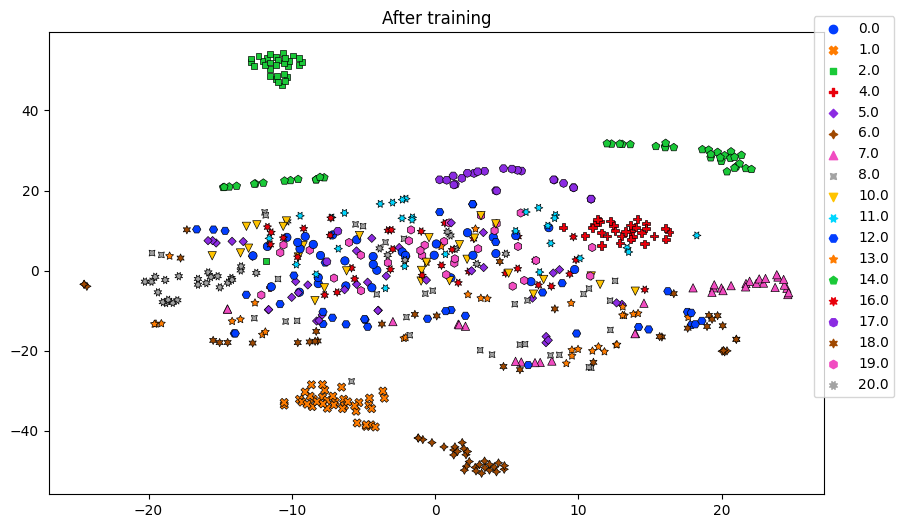

In [87]:
x_embedded = TSNE(n_components=2, learning_rate='auto',init='random',random_state=42).fit_transform(x_train[::10,:].reshape(len(x_train[::10,:]),-1))
# Retrieve the original labels for the reduced data
y_label = enc.inverse_transform(y_train[::10,:]).reshape(-1)
# Create a scatterplot of the reduced data with different colors for each class
f, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x=x_embedded[:,0],y=x_embedded[:,1],hue=y_label,style=y_label,palette="bright",edgecolor='black')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('After training')
plt.show()

In [88]:
from tensorflow.keras import Model

intermediate_model = Model(inputs=best_model.input,outputs=best_model.layers[-2].output)
intermediate_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 20, 45)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 18, 80)         │        10,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 16, 80)         │        19,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,144 (438.06 KB)

 Trainable params: 112,144 (438.06 KB)

 Non-trainable params: 0 (0.00 B)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


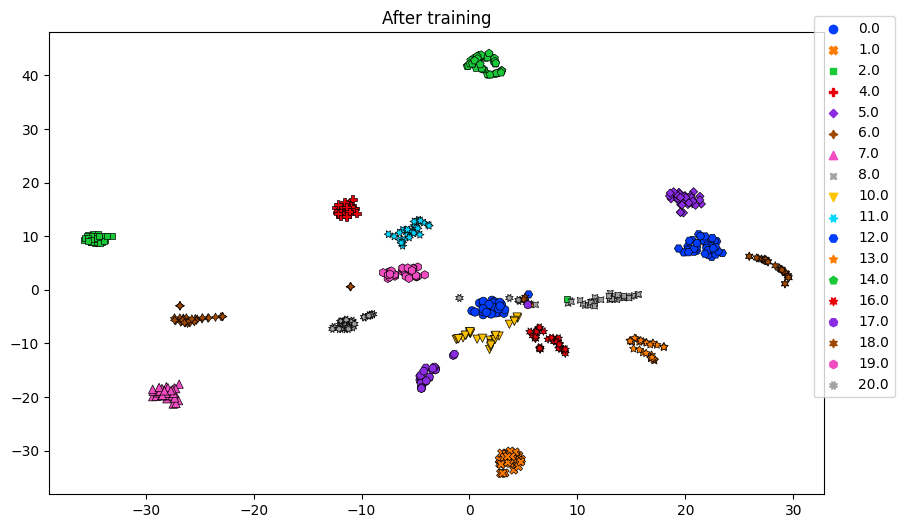

In [89]:
x_inter = intermediate_model.predict(x_train[::10,:])
# Use t-SNE to reduce the dimensionality of the intermediate output to 2D
x_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(x_inter)
# Get the true labels for every data point in the training set
y_label = enc.inverse_transform(y_train[::10,:]).reshape(-1)
# Create a scatter plot of the embedded data, colored by the true labels
f, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x=x_embedded[:,0],y=x_embedded[:,1],hue=y_label,style=y_label,palette="bright",edgecolor='black')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('After training')
plt.show()

LSTM


Trial 10 Complete [00h 01m 49s]
val_loss: 0.10658762976527214

Best val_loss So Far: 0.10518092289566994
Total elapsed time: 00h 14m 24s
Epoch 1/200


C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 28 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.9762 - loss: 0.0843 - val_accuracy: 0.9705 - val_loss: 0.1003
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9807 - loss: 0.0574 - val_accuracy: 0.9658 - val_loss: 0.1325
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.9786 - loss: 0.0642 - val_accuracy: 0.9571 - val_loss: 0.1255
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.9822 - loss: 0.0511 - val_accuracy: 0.9604 - val_loss: 0.1296
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9812 - loss: 0.0528 - val_accuracy: 0.9678 - val_loss: 0.1072
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9874 - loss: 0.0382 - val_accuracy: 0.9651 - val_loss: 0.1236


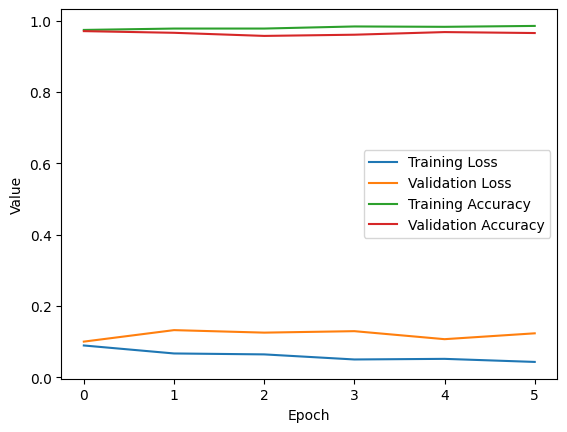

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
F1 Score: 0.9648015228092475


In [90]:
import keras_tuner as kt
from keras.models import Model
from keras.layers import Input, Bidirectional, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Function to create an LSTM model
def LSTM_model(hp):
    # Define input layer
    input_layer = Input(shape=(x_train.shape[1], x_train.shape[2]))

    # Define encoder layers with tunable units
    units = hp.Int('units', min_value=32, max_value=256, step=32)
    encoded = Bidirectional(LSTM(units, activation="tanh", return_sequences=True))(input_layer)
    encoded = LSTM(units, activation="tanh")(encoded)

    # Define decoder layers
    dense_units = hp.Int('dense_units', min_value=100, max_value=300, step=50)
    decoded = Dense(dense_units, activation='selu')(encoded)
    decoded = Dropout(0.5)(decoded)
    decoded = Dense(y_train.shape[1], activation='softmax')(decoded)

    # Define LSTM model
    lstm_model = Model(inputs=input_layer, outputs=decoded)
    # Compile LSTM model
    lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return lstm_model

# Use Keras Tuner to find the best model
tuner = kt.RandomSearch(
    LSTM_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='tuner_results',
    project_name='LSTM_tuning'
)

# Search for the best hyperparameters
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=256)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the best model
history = best_model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=256,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

# Plot the training history for loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

# Predict using the best model
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate the F1 Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("F1 Score:", f1)


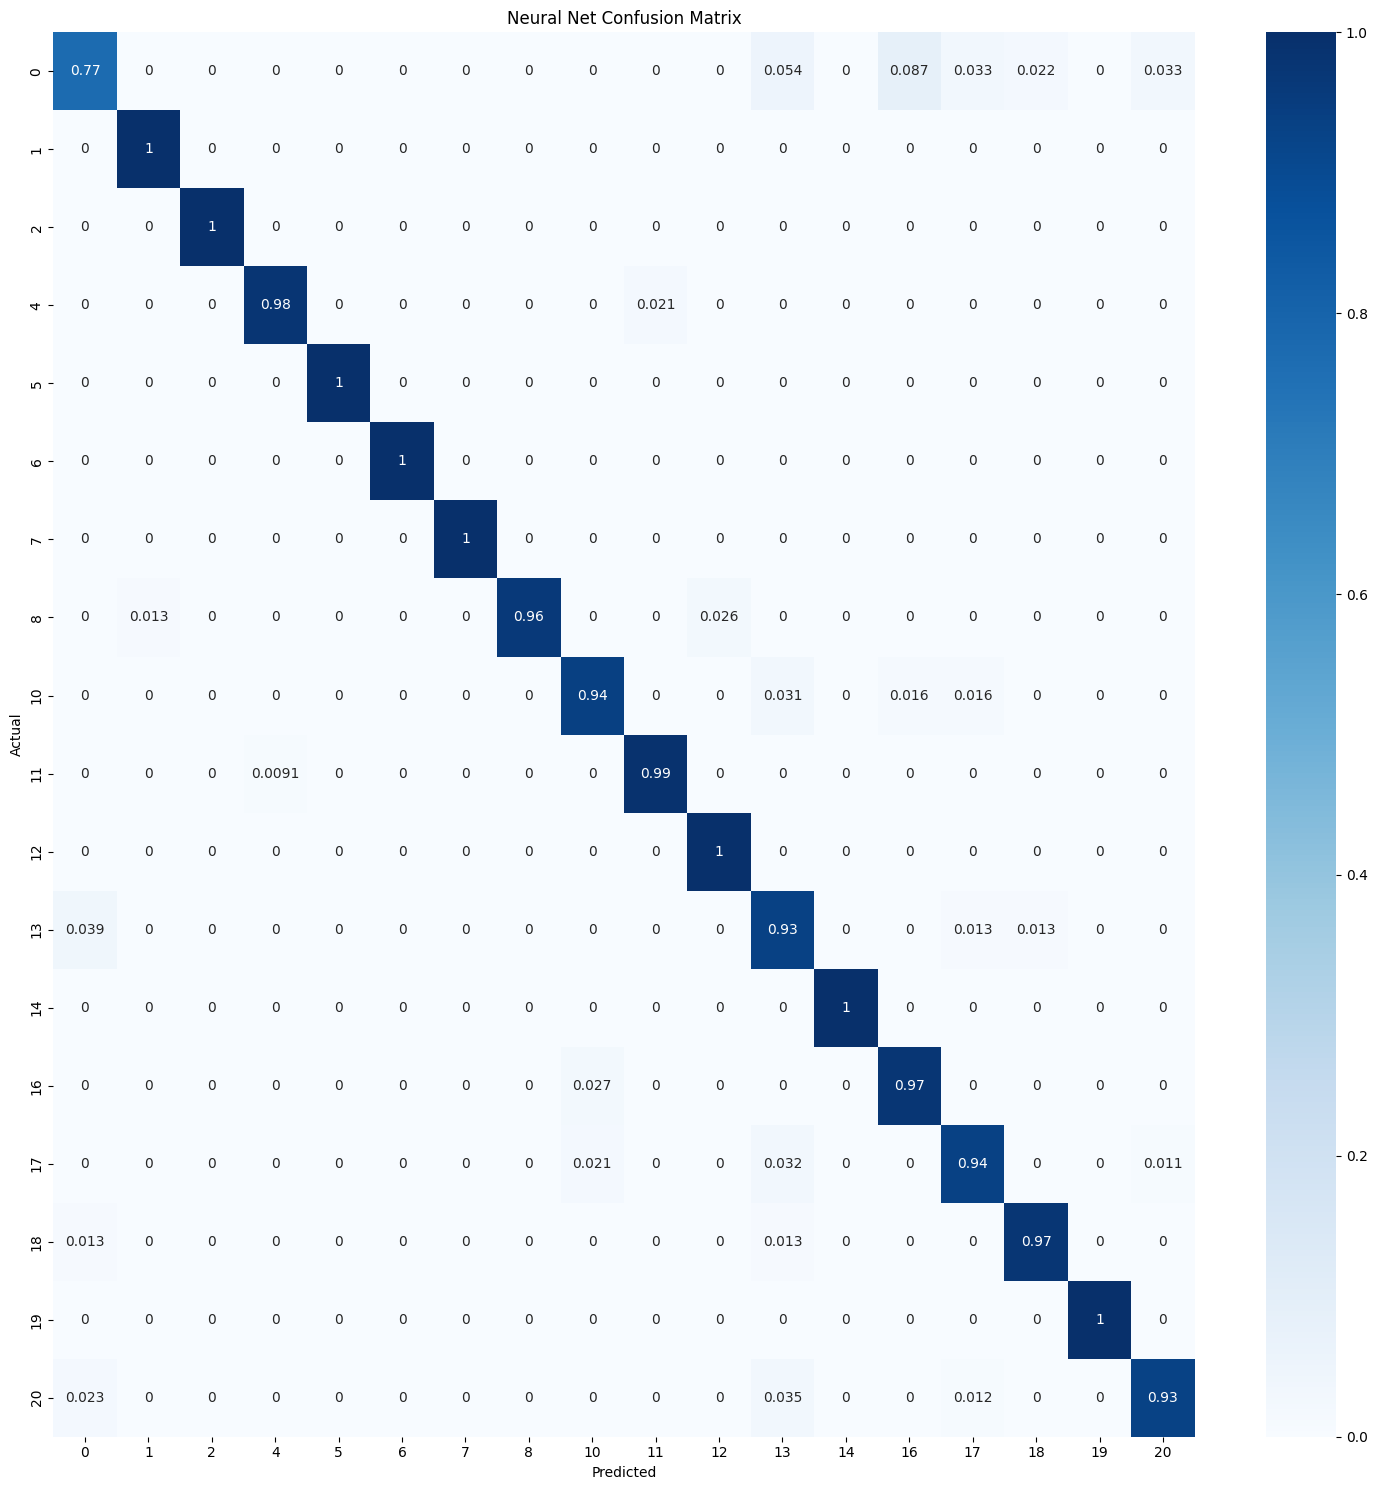

Lstm accuracy_score: 0.9651240778001341


In [93]:
def plot_confusion_matrix(y_true, y_pred, title):
    f, ax = plt.subplots(figsize=(15, 15))
    cm = confusion_matrix(y_true, y_pred,normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues',ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels([str(x) for x in range(0,21) if x not in [3,9,15]])
    ax.set_yticklabels([str(x) for x in range(0,21) if x not in [3,9,15]])
    ax.set_ylim(len(cm), 0)
    plt.tight_layout()
    plt.show()

y_pred = enc.inverse_transform(best_model.predict(x_test, verbose=0))
y_true = enc.inverse_transform(y_test)
    
# Plot the confusion matrix and print the f1 score for each algorithm
plot_confusion_matrix(y_true, y_pred, 'Neural Net Confusion Matrix')
print("Lstm accuracy_score:", accuracy_score(y_true, y_pred))

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


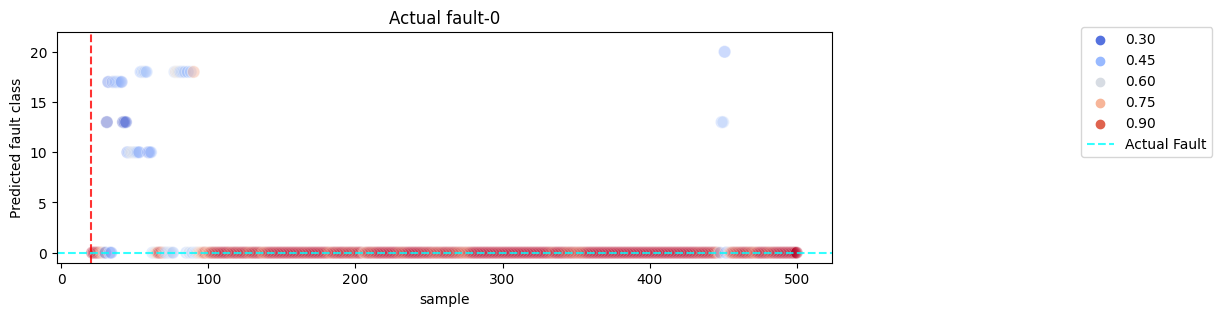

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


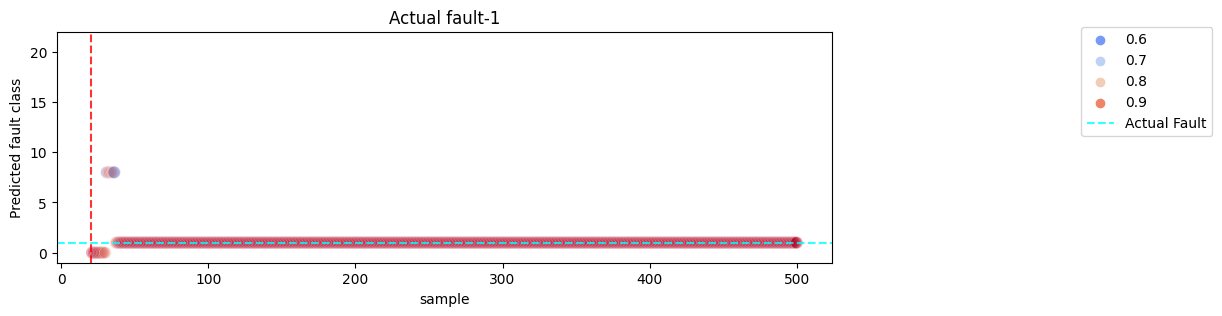

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


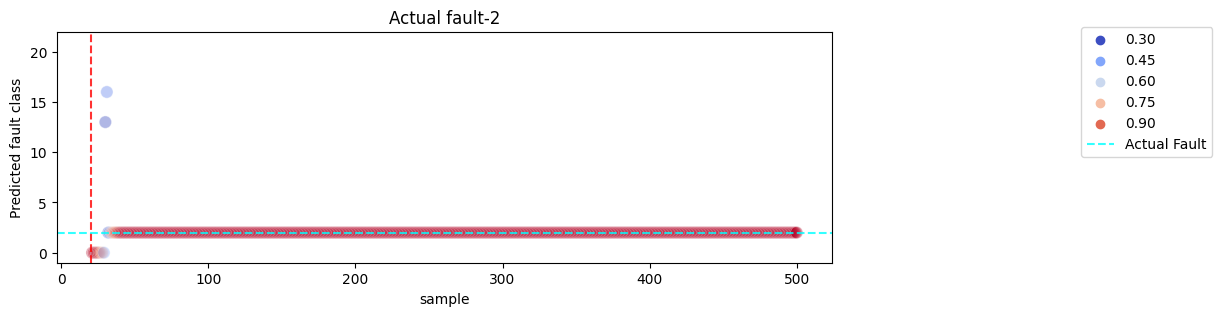

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


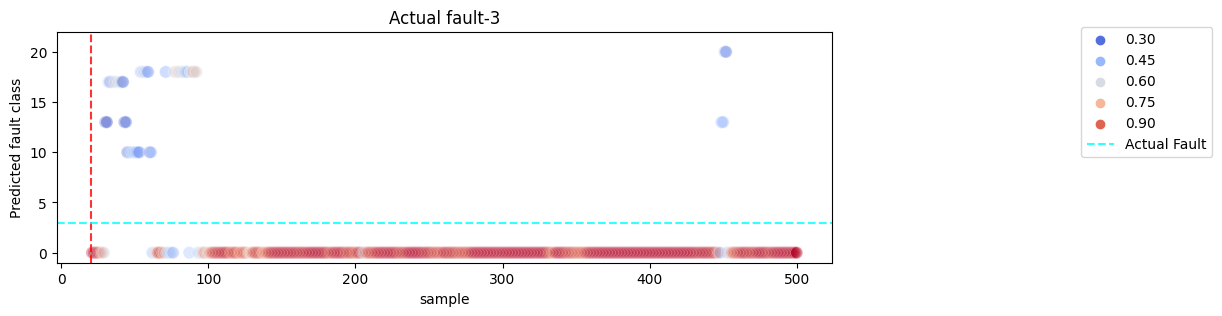

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


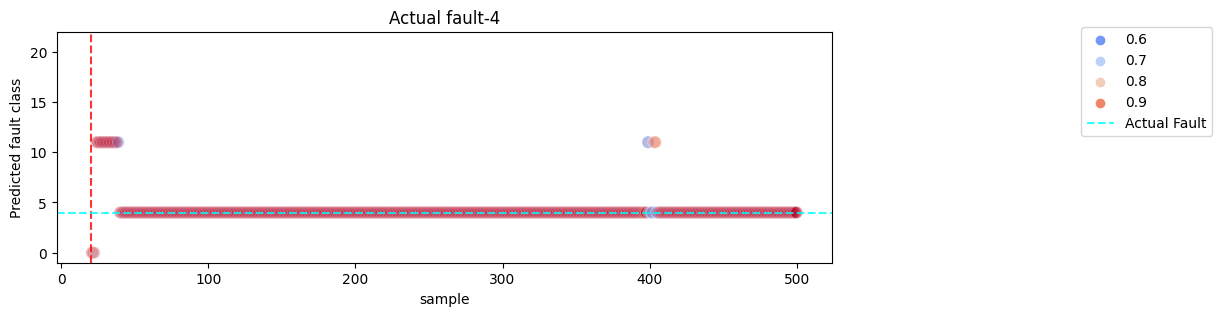

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


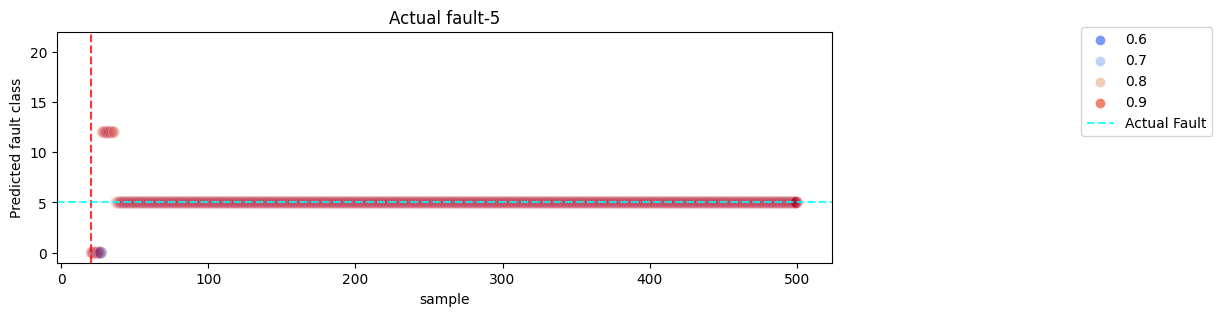

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


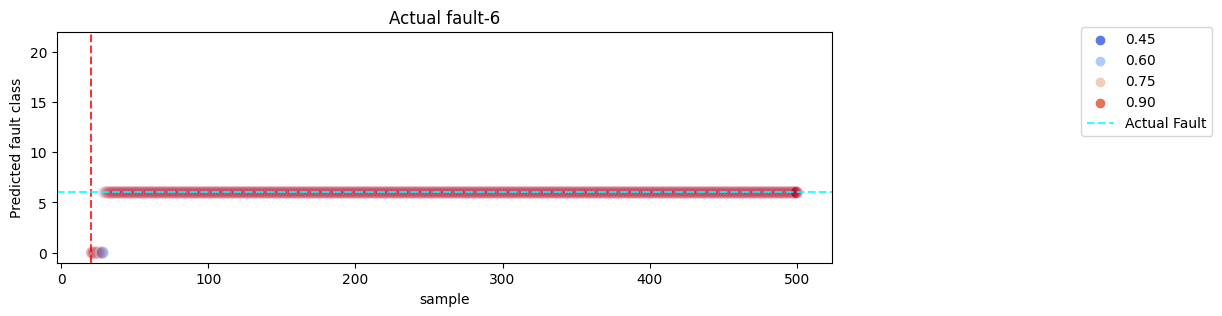

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


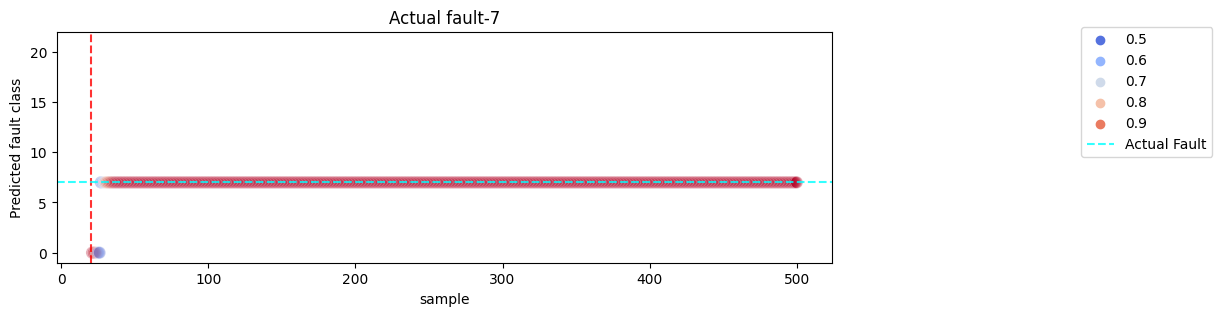

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


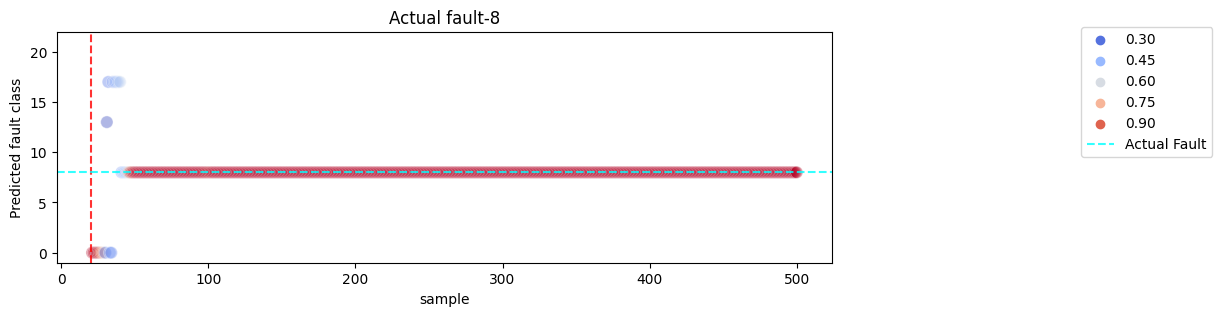

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


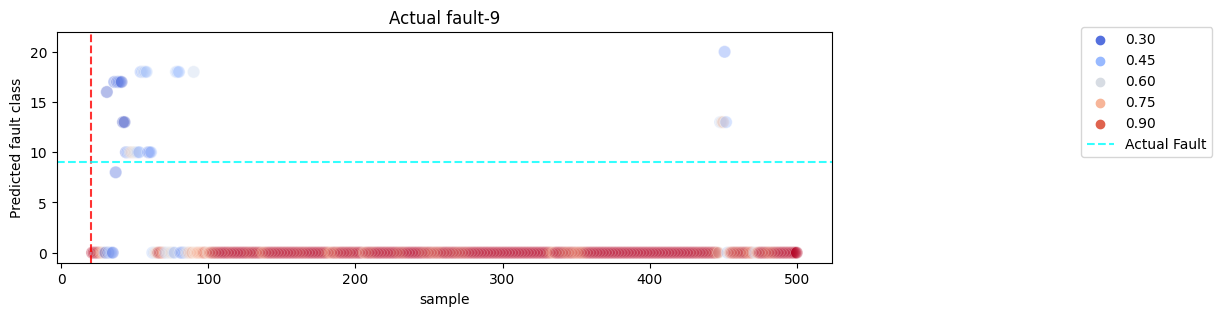

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


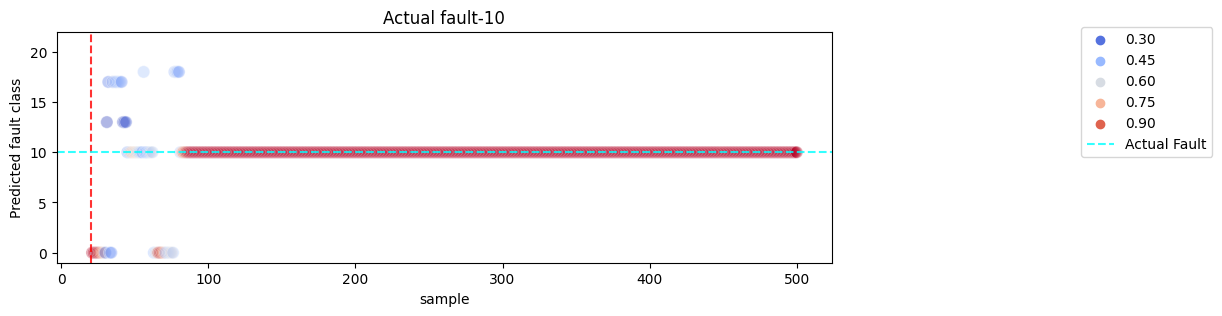

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


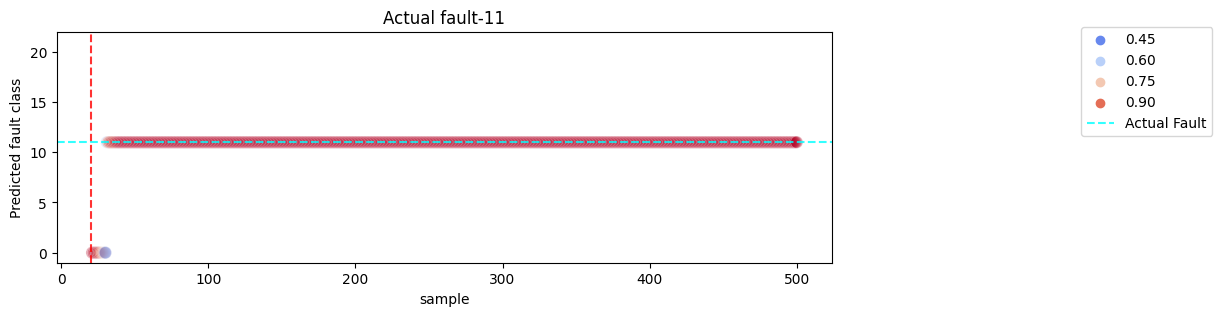

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


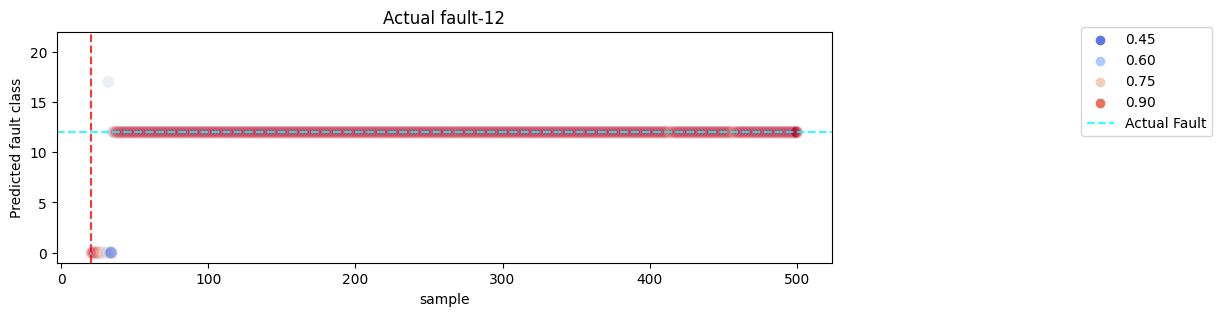

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


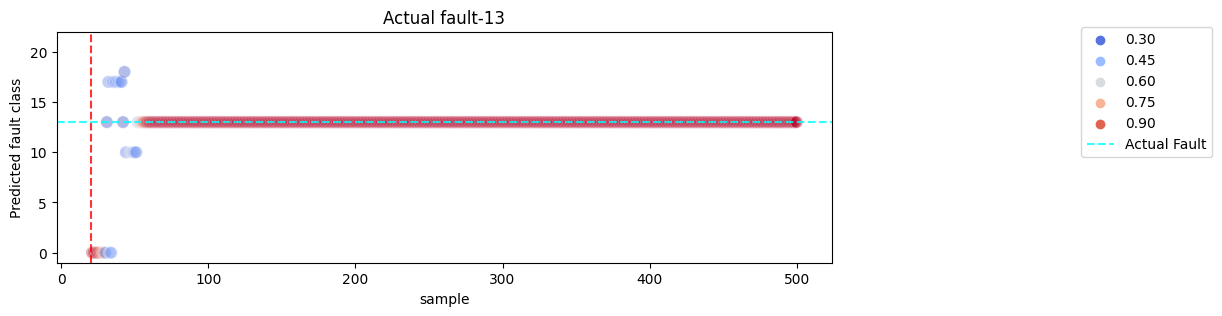

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


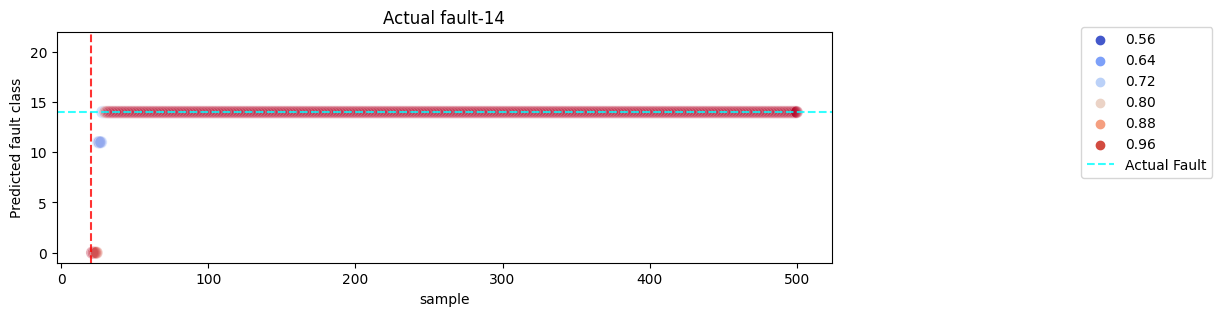

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


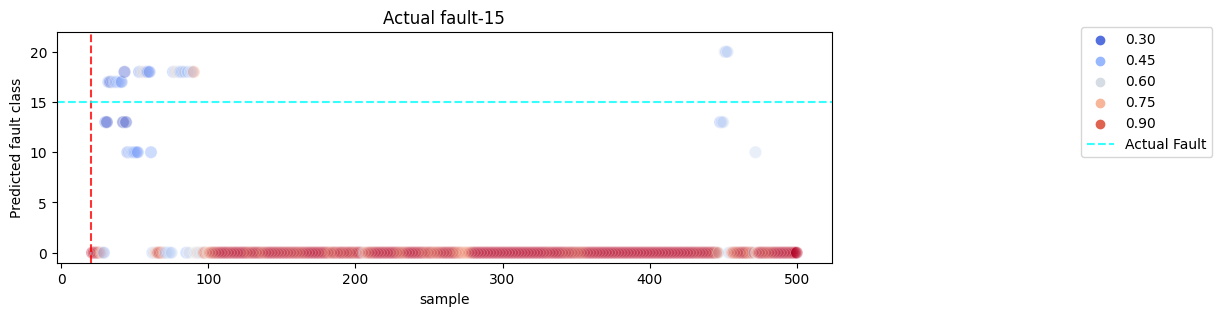

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


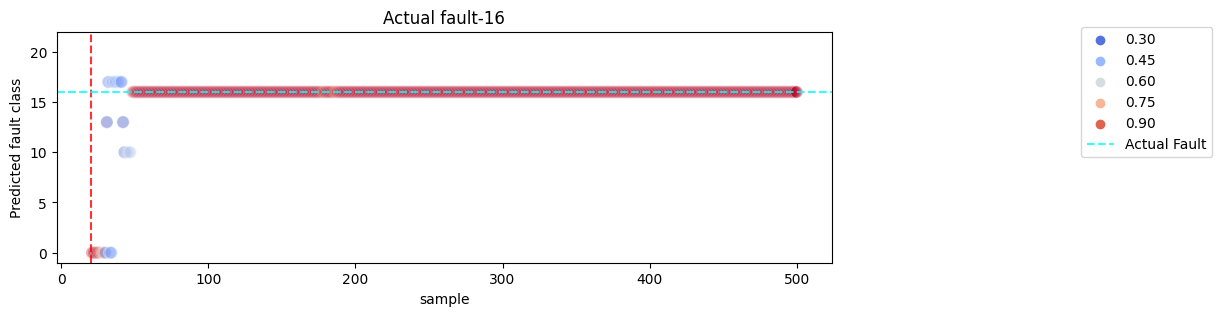

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


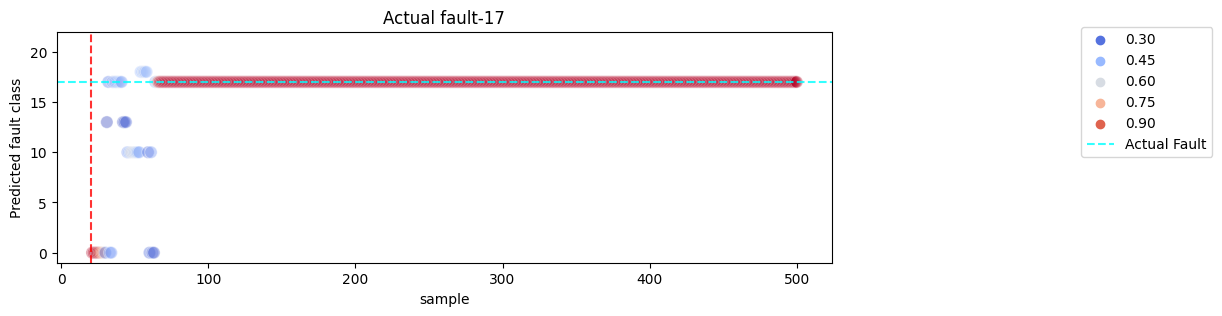

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


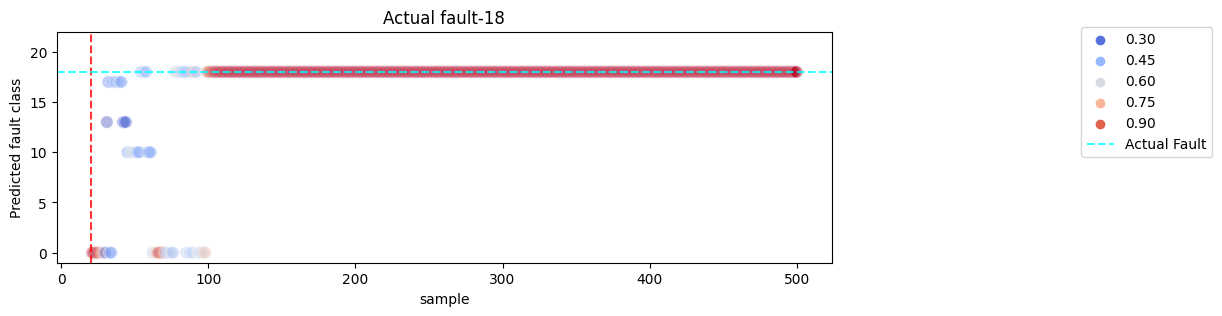

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


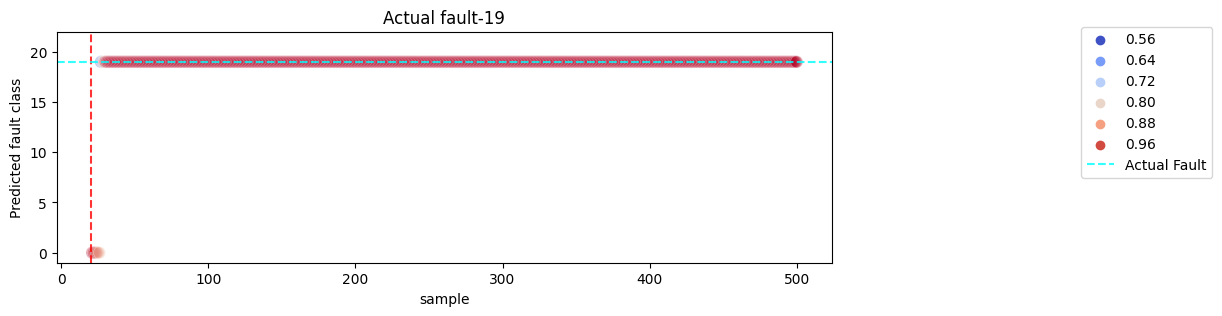

C:\Users\Samarth\AppData\Roaming\Python\Python311\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


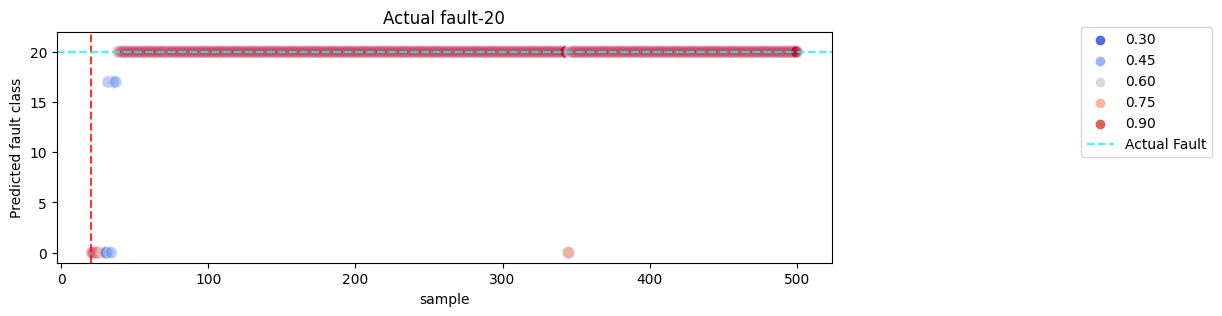

In [94]:
for F_num in range(0,21):
    # select the fault data each fault
    df_new= DF[(DF['faultNumber']==F_num) & (DF['simulationRun']==1)].copy()
    df_new.drop(columns=to_remove,inplace=True)
    df_new.iloc[:,3:] = sc.transform(df_new.iloc[:,3:])

    # create sliding window data
    x_new,y_new =  SlidingWindow(df_new,w=20,s=1)

    # predict fault class and probability for each sliding window
    y_pred = enc.inverse_transform(best_model.predict(x_new,verbose=0))
    y_proba = np.max(best_model.predict(x_new, verbose=0),axis=1)

    # plot the results
    f, ax = plt.subplots(figsize=(10,3))
    sns.scatterplot(x=df_new['sample'][w:],y=y_pred[:,0],hue=y_proba,palette="coolwarm",s=80,alpha=0.4,vmin=0, vmax=1)
    plt.axvline(20,c='r',alpha=0.8,linestyle ='--')
    plt.axhline(F_num,c='cyan',alpha=0.8,label='Actual Fault',linestyle ='--')
    plt.legend(bbox_to_anchor=(1.5, 1.05))
    plt.ylabel('Predicted fault class')
    plt.ylim([-1,22])
    plt.title(f'Actual fault-{F_num}')
    plt.show()

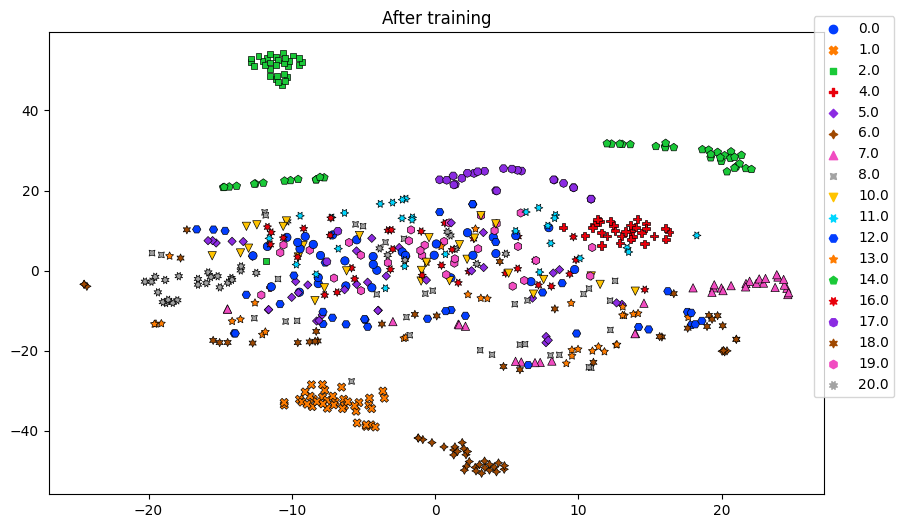

In [95]:
x_embedded = TSNE(n_components=2, learning_rate='auto',init='random',random_state=42).fit_transform(x_train[::10,:].reshape(len(x_train[::10,:]),-1))
# Retrieve the original labels for the reduced data
y_label = enc.inverse_transform(y_train[::10,:]).reshape(-1)
# Create a scatterplot of the reduced data with different colors for each class
f, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x=x_embedded[:,0],y=x_embedded[:,1],hue=y_label,style=y_label,palette="bright",edgecolor='black')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('After training')
plt.show()

In [96]:
from tensorflow.keras import Model

intermediate_model = Model(inputs=best_model.input,outputs=best_model.layers[-2].output)
intermediate_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 20, 45)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 20, 320)        │       263,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 160)            │       307,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │        32,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 603,720 (2.30 MB)

 Trainable params: 603,720 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


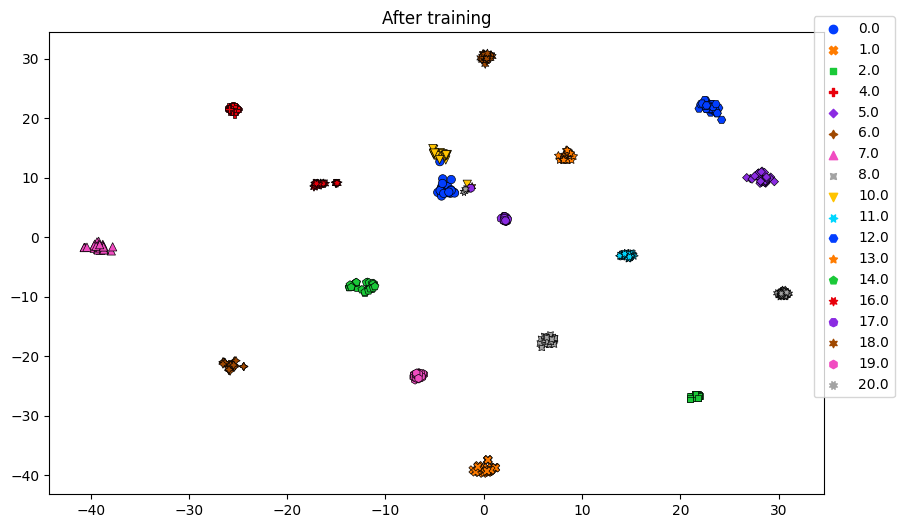

In [97]:
x_inter = intermediate_model.predict(x_train[::10,:])
# Use t-SNE to reduce the dimensionality of the intermediate output to 2D
x_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(x_inter)
# Get the true labels for every data point in the training set
y_label = enc.inverse_transform(y_train[::10,:]).reshape(-1)
# Create a scatter plot of the embedded data, colored by the true labels
f, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x=x_embedded[:,0],y=x_embedded[:,1],hue=y_label,style=y_label,palette="bright",edgecolor='black')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('After training')
plt.show()

In [98]:
Accuracy=[]
#For each fault number in the dataset
for Fnum in [x for x in range(0,21) if x not in [3,9,15]]:
    # Get data for a random simulation run
    df_new= DF[(DF['faultNumber']==F_num) & (DF['simulationRun']==np.random.randint(1,500))].copy()
    df_new.drop(columns=to_remove,inplace=True)
    df_new.iloc[:,3:] = sc.transform(df_new.iloc[:,3:])
    
    # Generate sliding windows from data
    x_new,y_true =  SlidingWindow(df_new,w=w,s=1)
    # Predict fault using LSTM model
    y_pred = enc.inverse_transform(best_model.predict(x_new, verbose=0))
    # Calculate accuracy of predicted fault
    acc = accuracy_score(y_true, y_pred)
    print(f'The accuracy for Fault_num={Fnum} is {acc}')
    # Append accuracy to list
    Accuracy.append(acc)
    
print("#"*20)
print(f'The overall accuracy is {np.mean(Accuracy)}')

The accuracy for Fault_num=0 is 0.8854166666666666
The accuracy for Fault_num=1 is 0.86875
The accuracy for Fault_num=2 is 0.8270833333333333
The accuracy for Fault_num=4 is 0.88125
The accuracy for Fault_num=5 is 0.94375
The accuracy for Fault_num=6 is 0.875
The accuracy for Fault_num=7 is 0.9041666666666667
The accuracy for Fault_num=8 is 0.88125
The accuracy for Fault_num=10 is 0.9541666666666667
The accuracy for Fault_num=11 is 0.8645833333333334
The accuracy for Fault_num=12 is 0.8833333333333333
The accuracy for Fault_num=13 is 0.8583333333333333
The accuracy for Fault_num=14 is 0.8875
The accuracy for Fault_num=16 is 0.9208333333333333
The accuracy for Fault_num=17 is 0.9354166666666667
The accuracy for Fault_num=18 is 0.94375
The accuracy for Fault_num=19 is 0.9604166666666667
The accuracy for Fault_num=20 is 0.8791666666666667
####################
The overall accuracy is 0.8974537037037038
